# Vacancies Preprocessing

In [ ]:
import pandas as pd
df=pd.read_csv('vacancies.csv')
df

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
0,2663,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Продуктовый аналитик в портал об осознанном от...,Продуктовый аналитик в портал об осознанном от...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117146306,2025-03-07 12:39:09.004232,Настройка и интеграция метрик. Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Екатеринбург,СБЕР,Банк,"Data Analyst (блок ""В2С"") (Екатеринбург)",ИТ B2C — самая крупная экосистема в Сбере. Нас...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117228230,2025-03-07 12:39:09.004232,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,Екатеринбург,Гринфилдс-Логистика,Розничная сеть (продуктовая),Аналитик данных (Екатеринбург),Что мы предлагаем для комфортной работы: Офиц...,"MS Excel, Аналитика, Business intelligence, Po...",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117185176,2025-03-07 12:39:09.004232,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Екатеринбург,Т1,Разработка программного обеспечения,Аналитик данных (Data Analyst) (Екатеринбург),Обязанности: Развитие внутреннего сервиса по ...,"Big Data, Python, SQL",От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117286539,2025-03-07 12:39:09.004232,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,Екатеринбург,СБЕР,Банк,Аналитик данных (Екатеринбург),Наша команда ищет аналитика данных для работы ...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118009619,2025-03-07 12:39:09.004232,проводить исследования пользовательских путей....,высшее техническое или экономическое образован...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2287,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Аналитик данных / дата аналитик / data analyst...,Ключевые задачи: Участие в управление рисками...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117951603,2025-03-07 12:39:09.004232,Участие в управление рисками по портфелю розни...,Образование: высшее экономическое/математическ...
1077,2289,Екатеринбург,Быков Я.А.,Разработка программного обеспечения,"Data Engineer (DWH, Hadoop, ETL), Data Analyst...","Вас привлекает работа с большими данными, кото...","Big Data, Clickhouse, PostgreSQL, ETL, SQL, Ap...",От 3 до 6 лет,250000,https://hh.ru/vacancy/117992024,2025-03-07 12:39:09.004232,"Необходимо будет быстро влиться в процесс, изу...","опыт построение DWH, витрин данных (BI); ETL/E..."
1078,2291,Екатеринбург,ГБУЗ «Научно-практический клинический центр ди...,Государственные организации,Аналитик данных (SQL) (Екатеринбург),Обязанности Уверенное владение современным пр...,NaN,От 1 года до 3 лет,120000,https://hh.ru/vacancy/117464255,2025-03-07 12:39:09.004232,Уверенное владение современным программным обе...,Умение анализировать и структурировать информа...
1079,2293,Екатеринбург,РТЛабс,"Системная интеграция, автоматизации технологи...",Аналитик данных Антифрод (портал gosuslugi.ru)...,РТЛабс создаёт и развивает масштабные цифровые...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/116806879,2025-03-07 12:39:09.004232,Выявлять аномалий в данных и выявление подозри...,Высшее техническое/математическое/экономическо...


In [ ]:
import re

# Основные шаблоны для responsibility
responsibility_patterns = [
    r'Задачи[:]?','Функционал[:]','Твоя миссия[:]?','Миссия[:]?', 'Вам предстоит[:]', 'Тебе предстоит[:]', 'Ваши задачи будут включать[:]',
    r'Ключевые задачи[:]?','Обязанности[:]?','Основные задачи[:]?', 'Задачи, которыми предстоит заниматься[:]',
    r'Чем вам предстоя?t\s*заниматься[:]?','Чем предстоит заниматься[:]','Что предстоит делать[:]?','Что нужно делать[:]'
    r'Какие задачи вас ждут[:]?','Твои задачи[:]?', 'Тебе предстоит[:]', 'Предстоящие задачи[:]',
    r'Твои задачи и ответственность[:]?'
]

# Основные шаблоны для requirement
requirement_patterns = [
    r'Требования[:]?','Что важно для нас[:]?','Эта вакансия для вас, если вы[:]?', 'Мы ожидаем от кандидата[:]',
    r'Что хотели бы видеть у вас[:]?','Вы нам подходите если[:]?', 'Наши ожидания от кандидатов[:]','Что ждем от кандидата[:]',
    r'Мы ждем что у тебя есть[:]?','Для команды важно[:]?', 'Тебе подойдет вакансия, если ты[:]',
    r'Нам интересен опыт[:]?','Что для нас важно[?]?', 'Какой опыт и навыки нам нужны[:]', 'Какие знания и опыт нам необходимы[:]',
    r'Что мы ожидаем от вас[:]?', 'Мы ждем от тебя[:]',
    r'Что важно[:]?', 'Мы ждем[:]', 'Мы ожидаем[:]'
]

def extract_section(text, patterns):
    """
    Ищем первое вхождение одного из паттернов и возвращаем
    текст после него, разбитый на задачи/требования.
    """
    # Приводим текст к единому виду
    text = text.strip()
    for pat in patterns:
        match = re.search(pat, text, flags=re.IGNORECASE)
        if match:
            # Извлекаем текст после найденного шаблона
            start_index = match.end()
            extracted = text[start_index:].strip()
            # Разбиваем на отдельные фрагменты по разделителям
            tasks = re.split(r'[;\n\-\.]', extracted)
            tasks = [task.strip() for task in tasks if task.strip()]
            # Собираем задачи в строку через точку с запятой
            return "; ".join(tasks)
    return None

# data = pd.read_csv("vacancies.csv")

# Применяем функцию к столбцу keywords для извлечения информации
# Если столбцы responsibility и requirement пусты, заполняем их полученными значениями
data["responsibility_filled"] = data.apply(
    lambda row: row["responsibility"] if pd.notnull(row["responsibility"])
                else extract_section(row["keywords"], responsibility_patterns),
    axis=1
)

data["requirement_filled"] = data.apply(
    lambda row: row["requirement"] if pd.notnull(row["requirement"])
                else extract_section(row["keywords"], requirement_patterns),
    axis=1
)

data[["id", "responsibility_filled", "requirement_filled"]]


,id,responsibility_filled,requirement_filled
0,2663,Настройка и интеграция метрик. Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,проводить исследования пользовательских путей....,высшее техническое или экономическое образован...
...,...,...,...
1076,2309,Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо..."
1077,2313,Анализ источников данных. Определение порядка ...,Опыт работы с ETL инструментами. Знание SQL. К...
1078,2884,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...
1079,3324,Разработка моделей данных QlikSence и построен...,"Профильное высшее образование экономической, м..."


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return text

    # Сначала заменяем специальные случаи с точками в словах
    text = re.sub(r'([а-яА-Яa-zA-Z])\.([а-яА-Яa-zA-Z])', r'\1\2', text)  # т.ч. -> тч
    text = re.sub(r'([а-яА-Яa-zA-Z])\.([а-яА-Яa-zA-Z])', r'\1\2', text)
    text = re.sub(r'Яндекс\.Метрика', 'Яндекс Метрика', text, flags=re.IGNORECASE)
    text = re.sub(r'Яндекс\.([А-Яа-я]+)', r'Яндекс \1', text, flags=re.IGNORECASE)

    # Заменяем точки на разделители, но сохраняем точки в числах (например, 1.5)
    text = re.sub(r'(?<!\d)\.(?!\d)', ';', text)

    # Удаляем лишние пробелы вокруг разделителей
    text = re.sub(r'\s*;\s*', '; ', text)

    return text.strip()

# Применяем очистку к нашим столбцам
data["responsibility_filled"] = data["responsibility_filled"].apply(clean_text)
data["requirement_filled"] = data["requirement_filled"].apply(clean_text)

data[["id", "responsibility_filled", "requirement_filled"]]

,id,responsibility_filled,requirement_filled
0,2663,Настройка и интеграция метрик; Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,проводить исследования пользовательских путей;...,высшее техническое или экономическое образован...
...,...,...,...
1076,2309,Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо..."
1077,2313,Анализ источников данных; Определение порядка ...,Опыт работы с ETL инструментами; Знание SQL; К...
1078,2884,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...
1079,3324,Разработка моделей данных QlikSence и построен...,"Профильное высшее образование экономической, м..."


In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_excel("vacancies_25.03.xlsx")
df

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement,responsibility_filled,requirement_filled
0,2663,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Продуктовый аналитик в портал об осознанном от...,Продуктовый аналитик в портал об осознанном от...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117146306,2025-03-07 12:39:09.004232,Настройка и интеграция метрик. Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...,Настройка и интеграция метрик; Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Екатеринбург,СБЕР,Банк,"Data Analyst (блок ""В2С"") (Екатеринбург)",ИТ B2C — самая крупная экосистема в Сбере. Нас...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117228230,2025-03-07 12:39:09.004232,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,...",Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,Екатеринбург,Гринфилдс-Логистика,Розничная сеть (продуктовая),Аналитик данных (Екатеринбург),Что мы предлагаем для комфортной работы: Офиц...,"MS Excel, Аналитика, Business intelligence, Po...",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117185176,2025-03-07 12:39:09.004232,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,...","Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Екатеринбург,Т1,Разработка программного обеспечения,Аналитик данных (Data Analyst) (Екатеринбург),Обязанности: Развитие внутреннего сервиса по ...,"Big Data, Python, SQL",От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117286539,2025-03-07 12:39:09.004232,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ...",Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,Екатеринбург,СБЕР,Банк,Аналитик данных (Екатеринбург),Наша команда ищет аналитика данных для работы ...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118009619,2025-03-07 12:39:09.004232,проводить исследования пользовательских путей....,высшее техническое или экономическое образован...,проводить исследования пользовательских путей;...,высшее техническое или экономическое образован...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2309,Екатеринбург,Lamoda,"Одежда, обувь, аксессуары, текстиль (продвиже...",Аналитик данных (маркетинг) (Екатеринбург),Чем предстоит заниматься: Поддержка текущих п...,"SQL, Маркетинговый анализ, Аналитическое мышле...",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117844867,2025-03-07 12:39:09.004232,Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо...",Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо..."
1077,2313,Екатеринбург,Открытые Технологии,Разработка программного обеспечения,Аналитик данных (Екатеринбург),Мы аккредитованная IT-компания SOFTAILOR (ГК О...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117747295,2025-03-07 12:39:09.004232,Анализ источников данных. Определение порядка ...,Опыт работы с ETL инструментами. Знание SQL. К...,Анализ источников данных; Определение порядка ...,Опыт работы с ETL инструментами; Знание SQL; К...
1078,2884,Екатеринбург,HuntIT,Unknown,Data analyst (middle) (Екатеринбург),HuntIT - это передовое рекрутинговое агентство...,"SQL, Python",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117042862,2025-03-07 12:39:09.004232,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...
1079,3324,Екатеринбург,СБЕР,Банк,Аналитик данных SQL (Екатеринбург),Мы работаем в Штабе дивизиона «Центр 

In [ ]:
df.drop(columns=['responsibility', 'requirement'], inplace=True)

# Переименование колонок
df.rename(columns={
    'responsibility_filled': 'responsibility',
    'requirement_filled': 'requirement'
}, inplace=True)
df

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
0,2663,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Продуктовый аналитик в портал об осознанном от...,Продуктовый аналитик в портал об осознанном от...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117146306,2025-03-07 12:39:09.004232,Настройка и интеграция метрик; Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Екатеринбург,СБЕР,Банк,"Data Analyst (блок ""В2С"") (Екатеринбург)",ИТ B2C — самая крупная экосистема в Сбере. Нас...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117228230,2025-03-07 12:39:09.004232,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,Екатеринбург,Гринфилдс-Логистика,Розничная сеть (продуктовая),Аналитик данных (Екатеринбург),Что мы предлагаем для комфортной работы: Офиц...,"MS Excel, Аналитика, Business intelligence, Po...",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117185176,2025-03-07 12:39:09.004232,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Екатеринбург,Т1,Разработка программного обеспечения,Аналитик данных (Data Analyst) (Екатеринбург),Обязанности: Развитие внутреннего сервиса по ...,"Big Data, Python, SQL",От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117286539,2025-03-07 12:39:09.004232,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,Екатеринбург,СБЕР,Банк,Аналитик данных (Екатеринбург),Наша команда ищет аналитика данных для работы ...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118009619,2025-03-07 12:39:09.004232,проводить исследования пользовательских путей;...,высшее техническое или экономическое образован...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2309,Екатеринбург,Lamoda,"Одежда, обувь, аксессуары, текстиль (продвиже...",Аналитик данных (маркетинг) (Екатеринбург),Чем предстоит заниматься: Поддержка текущих п...,"SQL, Маркетинговый анализ, Аналитическое мышле...",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117844867,2025-03-07 12:39:09.004232,Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо..."
1077,2313,Екатеринбург,Открытые Технологии,Разработка программного обеспечения,Аналитик данных (Екатеринбург),Мы аккредитованная IT-компания SOFTAILOR (ГК О...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117747295,2025-03-07 12:39:09.004232,Анализ источников данных; Определение порядка ...,Опыт работы с ETL инструментами; Знание SQL; К...
1078,2884,Екатеринбург,HuntIT,Unknown,Data analyst (middle) (Екатеринбург),HuntIT - это передовое рекрутинговое агентство...,"SQL, Python",От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117042862,2025-03-07 12:39:09.004232,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...
1079,3324,Екатеринбург,СБЕР,Банк,Аналитик данных SQL (Екатеринбург),Мы работаем в Штабе дивизиона «Центр Корпорати...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/118589961,2025-03-20 13:19:11.24272,Разработка моделей данных QlikSence и построен...,"Профильное высшее образование экономической, м..."


In [ ]:
# Дуюликаты по ссылкам
duplicates = df[df.duplicated('url', keep=False)]

# Сортировка по 'title'
duplicates_sorted = duplicates.sort_values(by='title')

duplicates_sorted

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement


In [ ]:
# Заменим , на ; в skills для neo4j

df['skills'] = df['skills'].str.replace(',', ';')

print(df['skills'].head())

0                                                  NaN
1                                                  NaN
2    MS Excel; Аналитика; Business intelligence; Po...
3                                Big Data; Python; SQL
4                                                  NaN
Name: skills, dtype: object


In [ ]:
# Доп обработка

cut_patterns = [
    r'Требования[:]?', r'Что важно для нас[:]?', r'Эта вакансия для вас, если вы[:]?', r'Мы ожидаем от кандидата[:]',
    r'Что хотели бы видеть у вас[:]?', r'Вы нам подходите если[:]?', r'Наши ожидания от кандидатов[:]', r'Что ждем от кандидата[:]',
    r'Мы ждем что у тебя есть[:]?', r'Для команды важно[:]?', r'Тебе подойдет вакансия, если ты[:]',
    r'Нам интересен опыт[:]?', r'Что для нас важно[?]?', r'Какой опыт и навыки нам нужны[:]', r'Какие знания и опыт нам необходимы[:]',
    r'Что мы ожидаем от вас[:]?', r'Мы ждем от тебя[:]',
    r'Что важно[:]?', r'Мы ждем[:]', r'Мы ожидаем[:]', r'Условия[:]', r'Что мы предлагаем[:]?'
]

def clean_responsibility(text):
    """Оставляет только текст ДО первого вхождения шаблона."""
    if pd.isna(text):
        return text  # Пропущенные значения оставляем как есть

    # Ищем первое вхождение любого из шаблонов
    earliest_pos = None
    for pattern in cut_patterns:
        match = re.search(pattern, text, flags=re.IGNORECASE)
        if match:
            if earliest_pos is None or match.start() < earliest_pos:
                earliest_pos = match.start()

    # Если шаблон найден, обрезаем текст до него
    if earliest_pos is not None:
        text = text[:earliest_pos].strip()

    return text if text else None  # Возвращаем None, если текст пустой

# Применяем функцию к столбцу responsibility
df['responsibility'] = df['responsibility'].apply(clean_responsibility)


In [ ]:
# Шаблоны для описания условий работы
cut_patterns = [
    r'Условия[:]',
    r'Что мы предлагаем[:]?',
]

def clean_requirement(text):
    """Оставляет только текст ДО первого вхождения шаблона."""
    if pd.isna(text):
        return text  # Пропущенные значения оставляем как есть

    # Ищем первое вхождение любого из шаблонов
    earliest_pos = None
    for pattern in cut_patterns:
        match = re.search(pattern, text, flags=re.IGNORECASE)
        if match:
            if earliest_pos is None or match.start() < earliest_pos:
                earliest_pos = match.start()

    # Если шаблон найден, обрезаем текст до него
    if earliest_pos is not None:
        text = text[:earliest_pos].strip()

    return text if text else None  # Возвращаем None, если текст пустой

# Применяем функцию к столбцу requirement
df['requirement'] = df['requirement'].apply(clean_requirement)

# print(df['requirement'].head())

In [ ]:
# Сохраняем в Excel (с выделением цветом пустых значений)
writer = pd.ExcelWriter("vacancies_26.03.xlsx", engine='xlsxwriter')
df.to_excel(writer, index=False, sheet_name='Вакансии')

# Добавляем условное форматирование для пустых ячеек
workbook = writer.book
worksheet = writer.sheets['Вакансии']
format_red = workbook.add_format({'bg_color': '#FFC7CE'})

worksheet.conditional_format(
    'L2:M1001',  # Диапазон столбцов responsibility_filled и requirement_filled
    {
        'type': 'blanks',
        'format': format_red
    }
)
writer.close()

In [ ]:
import pandas as pd

df = pd.read_excel('vacancies_26.03.xlsx', engine='openpyxl')
df

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
0,2663,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Продуктовый аналитик в портал об осознанном от...,Продуктовый аналитик в портал об осознанном от...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117146306,2025-03-07 12:39:09.004232,Настройка и интеграция метрик; Подключать и на...,Успешный опыт проведения A/B-тестов и аналитич...
1,2888,Екатеринбург,СБЕР,Банк,"Data Analyst (блок ""В2С"") (Екатеринбург)",ИТ B2C — самая крупная экосистема в Сбере. Нас...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117228230,2025-03-07 12:39:09.004232,Мониторинг и оптимизация процессов сборки витр...,"Опыт описания требований и ведения инструкций,..."
2,2242,Екатеринбург,Гринфилдс-Логистика,Розничная сеть (продуктовая),Аналитик данных (Екатеринбург),Что мы предлагаем для комфортной работы: Офиц...,MS Excel; Аналитика; Business intelligence; Po...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117185176,2025-03-07 12:39:09.004232,"Разработка, автоматизация и оптимизация отчетн...","Опыт работы аналитиком, финансовым аналитиком,..."
3,2247,Екатеринбург,Т1,Разработка программного обеспечения,Аналитик данных (Data Analyst) (Екатеринбург),Обязанности: Развитие внутреннего сервиса по ...,Big Data; Python; SQL,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117286539,2025-03-07 12:39:09.004232,Развитие внутреннего сервиса по построению рек...,"Опыт работы с базами данных, навыки написания ..."
4,2248,Екатеринбург,СБЕР,Банк,Аналитик данных (Екатеринбург),Наша команда ищет аналитика данных для работы ...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118009619,2025-03-07 12:39:09.004232,проводить исследования пользовательских путей;...,высшее техническое или экономическое образован...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,2309,Екатеринбург,Lamoda,"Одежда, обувь, аксессуары, текстиль (продвиже...",Аналитик данных (маркетинг) (Екатеринбург),Чем предстоит заниматься: Поддержка текущих п...,SQL; Маркетинговый анализ; Аналитическое мышле...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117844867,2025-03-07 12:39:09.004232,Поддержка текущих процессов отправок коммуника...,"Высшее образование (математическое, техническо..."
1068,2313,Екатеринбург,Открытые Технологии,Разработка программного обеспечения,Аналитик данных (Екатеринбург),Мы аккредитованная IT-компания SOFTAILOR (ГК О...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117747295,2025-03-07 12:39:09.004232,Анализ источников данных; Определение порядка ...,Опыт работы с ETL инструментами; Знание SQL; К...
1069,2884,Екатеринбург,HuntIT,Unknown,Data analyst (middle) (Екатеринбург),HuntIT - это передовое рекрутинговое агентство...,SQL; Python,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117042862,2025-03-07 12:39:09.004232,"Обработка данных, построение витрин данных сов...",Hard Skills: Отличное знание SQL (мы используе...
1070,3324,Екатеринбург,СБЕР,Банк,Аналитик данных SQL (Екатеринбург),Мы работаем в Штабе дивизиона «Центр Корпорати...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/118589961,2025-03-20 13:19:11.24272,Разработка моделей данных QlikSence и построен...,"Профильное высшее образование экономической, м..."


In [ ]:
df['title'].unique()

array(['Продуктовый аналитик в портал об осознанном отношении к здоровью (Екатеринбург)',
       'Data Analyst (блок "В2С") (Екатеринбург)',
       'Аналитик данных (Екатеринбург)',
       'Аналитик данных (Data Analyst) (Екатеринбург)',
       'Аналитик данных / bi-аналитик (middle) (Екатеринбург)',
       'Data Analyst (Екатеринбург)',
       'Аналитик данных в Excel (Екатеринбург)',
       'Middle Data Analyst (Екатеринбург)',
       'Аналитик данных (онлайн-школа) (Екатеринбург)',
       'Аналитик данных (Отдел цифрового аудита) (Екатеринбург)',
       'Аналитик BI / Аналитик данных (Екатеринбург)',
       'Аналитик данных (DWH) (Екатеринбург)',
       'Продуктовый аналитик / Аналитик по продукту / Аналитик данных / Маркетинговый аналитик (Екатеринбург)',
       'Автор курса «Аналитик данных +» (Екатеринбург)',
       'Аналитик данных / BI-аналитик (Екатеринбург)',
       'Младший аналитик данных (Екатеринбург)',
       'Data Analyst (ML) (Екатеринбург)',
       'ML-инженер / анали

## Duplicates

In [ ]:
# Поиск дубликатов по названию
duplicates = df[df.duplicated('keywords', keep=False)]

# Сортировка по title
duplicates_sorted = duplicates.sort_values(by='title')

duplicates_sorted

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
864,3206,Екатеринбург,ВПА Технологии,Unknown,BI-аналитик данных в Спорт Тех (Екатеринбург),VPA Sport — это стартап в сфере спортивных тех...,SQL; Обучение и развитие; Tableau; DataLens; С...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/118329915,2025-03-14 15:23:58.516781,предлагать идеи и референсы для построения опт...,больше года работали инженером данных; отличн...
865,3207,Екатеринбург,ВПА Технологии,Unknown,BI-аналитик данных в Спорт Тех (Екатеринбург),VPA Sport — это стартап в сфере спортивных тех...,SQL; Обучение и развитие; Tableau; DataLens; С...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/118329916,2025-03-14 15:23:58.516781,предлагать идеи и референсы для построения опт...,больше года работали инженером данных; отличн...
944,3348,Екатеринбург,Леста Игры,"Интернет-компания (поисковики, платежные систе...",Big Data infrastructure engineer/DWH (Москва) ...,Леста Игры разрабатывает игровые проекты в раз...,MySQL; MongoDB; Linux; Clickhouse; Kafka,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118585706,2025-03-20 13:19:11.24272,Поддержкой High Load систем; Взаимодействием с...,Опыт проектирования хранилищ данныххорошее зна...
723,2966,Екатеринбург,Леста Игры,"Интернет-компания (поисковики, платежные систе...",Big Data infrastructure engineer/DWH (Москва) ...,Леста Игры разрабатывает игровые проекты в раз...,MySQL; MongoDB; Linux; Clickhouse; Kafka,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/89853510,2025-03-07 12:39:09.004232,Поддержкой High Load систем; Взаимодействием с...,Опыт проектирования хранилищ данныххорошее зна...
708,2951,Екатеринбург,"Алабуга, ОЭЗ ППТ",Государственные организации,Computer Vision Engineer (CV) (Екатеринбург),Мы ищем увлеченного инженера по компьютерному ...,Геоинформационные системы; GIS; ДЗЗ; Data Scie...,От 3 до 6 лет,375000,https://hh.ru/vacancy/117878758,2025-03-07 12:39:09.004232,до готового решения; оптимизация и внедрение с...,"уверенные знания нейронных сетей (CNN, RNN, YO..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,3340,Екатеринбург,Т1,Разработка программного обеспечения,Продуктовый аналитик (Екатеринбург),Вместе с нами тебе предстоит: Управление жиз...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/118586817,2025-03-20 13:19:11.24272,Управление жизненным циклом продуктов; Анализ ...,Понимание рынка облачных услуг; тенденций разв...
221,2461,Екатеринбург,Е-Лаб,"Медицинское, диагностическое оборудование, инс...",Специалист по продукции / Менеджер-продуктолог...,Обязанности: Экспертно-консультационная и мет...,Хроматография; масс-спектрометрия; MALDI; анал...,От 3 до 6 лет,150000,https://hh.ru/vacancy/118007107,2025-03-07 12:39:09.004232,Экспертно консультационная и методическая подд...,Опыт работы от 1 года на позиции с аналогичным...
219,2460,Екатеринбург,Е-Лаб,"Медицинское, диагностическое оборудование, инс...",Специалист по продукции / Менеджер-продуктолог...,Обязанности: Экспертно-консультационная и мет...,Хроматография; масс-спектрометрия; MALDI; анал...,От 3 до 6 лет,150000,https://hh.ru/vacancy/118007106,2025-03-07 12:39:09.004232,Экспертно консультационная и методическая подд...,Опыт работы от 1 года на позиции с аналогичным...
116,2373,Екатеринбург,ТехноГрупп,Оборудование и станки для металлургии и металл...,Старший аналитик данных (Екатеринбург),ТЕХНОГРУПП — ведущий российский производитель ...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/115591095,2025-03-07 12:39:09.004232,"Работа с множеством источников данных: сбор, о...",Высшее образование; Продвинутый пользователь...


Видимо некоторые вакансии перепубликовывались

In [ ]:
def count_filled_columns(row):
    return row.notna().sum() + sum(len(x) > 0 if isinstance(x, (list, str)) else False for x in row)

df['filled_columns'] = df.apply(count_filled_columns, axis=1)

# Группировка по 'title' и выбор строки с максимальным количеством заполненных колонок
filtered_df = df.loc[df.groupby('keywords')['filled_columns'].idxmax()]

# Удаление вспомогательной колонки
filtered_df = filtered_df.drop(columns=['filled_columns'])

filtered_df

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
35,2303,Екатеринбург,М.Видео-Эльдорадо,"Розничная сеть (электроника, бытовая техника)",Аналитик данных (Екатеринбург),В Отдел анализа логистических процессов ищем...,MS Excel; MS SQL; Python; Power BI Tableau; Ан...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117580943,2025-03-07 12:39:09.004232,"Анализ данных из различных источников, построе...",Опыт работы с большим количеством данных от го...
389,2615,Екатеринбург,Марс,"Корма для животных (продвижение, оптовая торго...",Product Analyst (B2C) / Продуктовый аналитик (...,В нашу команду Ecosystem Growth необходим оп...,SQL; A/B тесты; CustDev; A/A тесты; User Exper...,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/116767761,2025-03-07 12:39:09.004232,Выполнять adhoc запросы средней трудоемкости: ...,"Опыт работы с B2C продуктами; Знания SQL, Exce..."
387,2613,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Продуктовый аналитик (Екатеринбург),Ключевые задачи: Определение потенциального...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117860964,2025-03-07 12:39:09.004232,"Определение потенциального объема клиентов, се...","Высшее техническое, математическое, финансовое..."
162,2409,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Аналитик данных (Екатеринбург),Ключевые задачи: - Разработка и внедрение по...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/115077736,2025-03-07 12:39:09.004232,Разработка и внедрение подходов к выявлению ин...,"Высшее техническое, математическое, финансовое..."
589,2815,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Data Engineer / DWH Developer / Разработчик ХД...,Компания «АстраЗенека» верит в потенциал сво...,MS SQL ServeR MS Integration Services; MS Anal...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/107650857,2025-03-07 12:39:09.004232,Разработка баз данных; Оптимизация запросов; Р...,"Опыт разработки реляционных баз данных, умение..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2576,Екатеринбург,Яндекс,"Интернет-компания (поисковики, платежные систе...",Data scientist в поиск Маркета (Екатеринбург),Яндекс Маркет — это один из крупнейших маркетп...,NaN,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117144780,2025-03-07 12:39:09.004232,Развивать ML модели ранжирования и рекомендаци...,Умеете писать на Python; Имеете практический о...
408,2632,Екатеринбург,Отм Ворлд Вайд,Разработка программного обеспечения,Продуктовый аналитик (Екатеринбург),билайн AdTech. ОТМ Ворлд Вайд. Мы успешно ре...,NaN,От 1 года до 3 лет,NaN,https://hh.ru/vacancy/117509049,2025-03-07 12:39:09.004232,участвовать в формировании портфеля продуктов;...,работали на аналогичной позиции более 2х лет; ...
881,3228,Екатеринбург,Бизнес-Азимут,"Системная интеграция, автоматизации технологи...",Data Engineer (Екатеринбург),"“Бизнес-Азимут” – команда профессионалов, созд...",ORACLE; Hadoop; Teradata; SQL; Python; Spark; ...,От 3 до 6 лет,300000,https://hh.ru/vacancy/117535075,2025-03-14 15:23:58.516781,Разработка и оптимизация ETL процессов на стек...,Опыт работы с ETL процессами от 3 лет; Глубо...
902,3249,Екатеринбург,Бизнес-Азимут,"Системная интеграция, автоматизации технологи...",Data Engineer (Екатеринбург),"“Бизнес-Азимут” – команда профессионалов, созд...",DWH; Teradata; Greenplum; ORACLE; PostgreSQL; ...,От 3 до 6 лет,300000,https://hh.ru/vacancy/118440349,2025-03-17 13:32:36.567615,"Разработка и доработка витрин данных, процессо...",Высшее техническое образование; Опыт работы с...


In [ ]:
duplicates = df[df.duplicated('id', keep=False)]

# Сортировка по столбцу 'title' для удобства просмотра
duplicates_sorted = duplicates.sort_values(by='id')

duplicates_sorted

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement


In [ ]:
filtered_df.to_csv('vacancies_30.csv', index=False, encoding='utf-8')

In [ ]:
import pandas as pd

df=pd.read_csv('vacancies_30.csv', encoding='utf-8')
df.head()

,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
0,2303,Екатеринбург,М.Видео-Эльдорадо,"Розничная сеть (электроника, бытовая техника)",Аналитик данных (Екатеринбург),В Отдел анализа логистических процессов ищем...,MS Excel; MS SQL; Python; Power BI Tableau; Ан...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117580943,2025-03-07 12:39:09.004232,"Анализ данных из различных источников, построе...",Опыт работы с большим количеством данных от го...
1,2615,Екатеринбург,Марс,"Корма для животных (продвижение, оптовая торго...",Product Analyst (B2C) / Продуктовый аналитик (...,В нашу команду Ecosystem Growth необходим оп...,SQL; A/B тесты; CustDev; A/A тесты; User Exper...,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/116767761,2025-03-07 12:39:09.004232,Выполнять adhoc запросы средней трудоемкости: ...,"Опыт работы с B2C продуктами; Знания SQL, Exce..."
2,2613,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Продуктовый аналитик (Екатеринбург),Ключевые задачи: Определение потенциального...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117860964,2025-03-07 12:39:09.004232,"Определение потенциального объема клиентов, се...","Высшее техническое, математическое, финансовое..."
3,2409,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Аналитик данных (Екатеринбург),Ключевые задачи: - Разработка и внедрение по...,NaN,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/115077736,2025-03-07 12:39:09.004232,Разработка и внедрение подходов к выявлению ин...,"Высшее техническое, математическое, финансовое..."
4,2815,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Data Engineer / DWH Developer / Разработчик ХД...,Компания «АстраЗенека» верит в потенциал сво...,MS SQL ServeR MS Integration Services; MS Anal...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/107650857,2025-03-07 12:39:09.004232,Разработка баз данных; Оптимизация запросов; Р...,"Опыт разработки реляционных баз данных, умение..."


# EDA

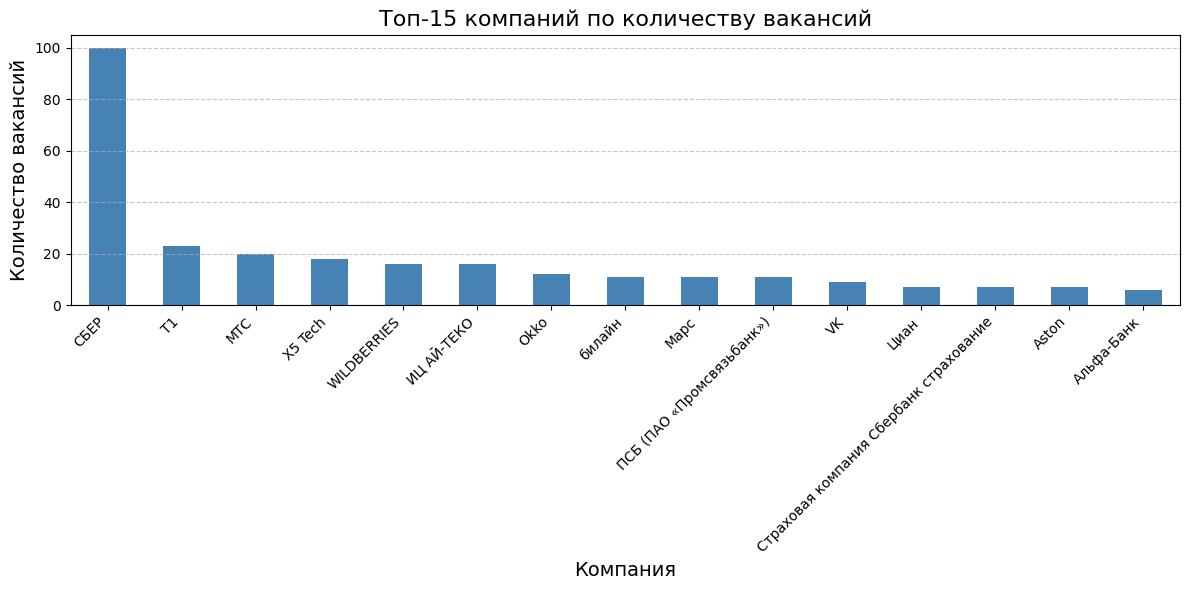

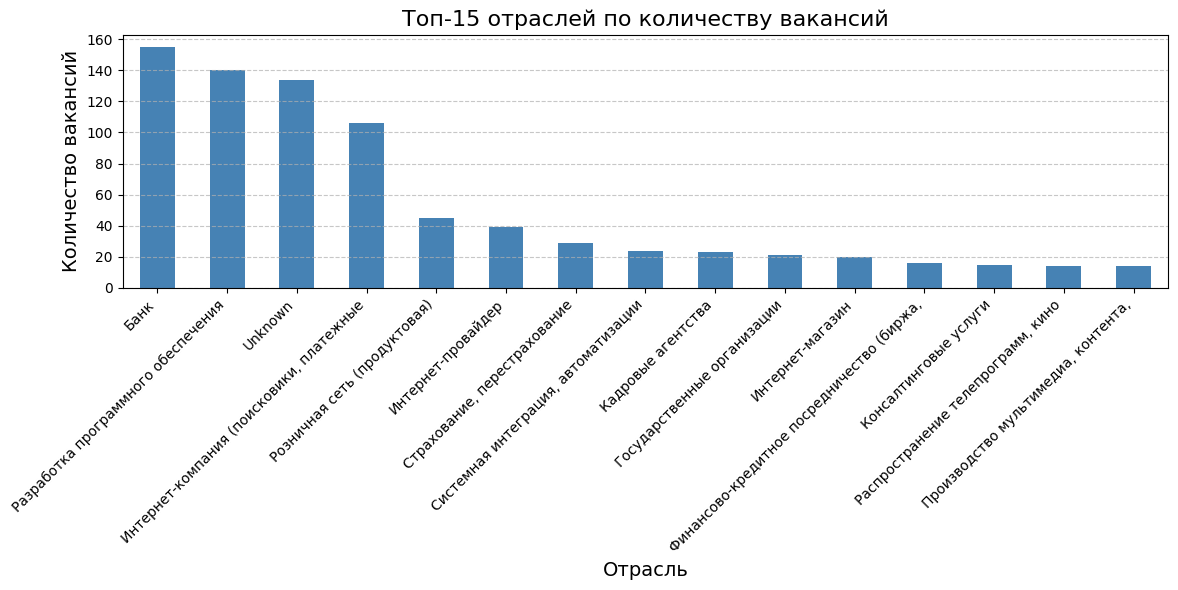

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Отключаем предупреждения по шрифтам
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Настройка шрифта (если установлен в системе)
plt.rcParams.update({'font.family': 'Times New Roman'})

# --- Топ-15 компаний ---
top_companies = df['company'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar', color='steelblue')
plt.title('Топ-15 компаний по количеству вакансий', fontsize=16)
plt.xlabel('Компания', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Топ-15 отраслей (сокращённые названия) ---
def simplify_industry(name):
    return " ".join(name.split()[:3])

df['industry_short'] = df['industry'].apply(simplify_industry)
top_industries_short = df['industry_short'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_industries_short.plot(kind='bar', color='steelblue')
plt.title('Топ-15 отраслей по количеству вакансий', fontsize=16)
plt.xlabel('Отрасль', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


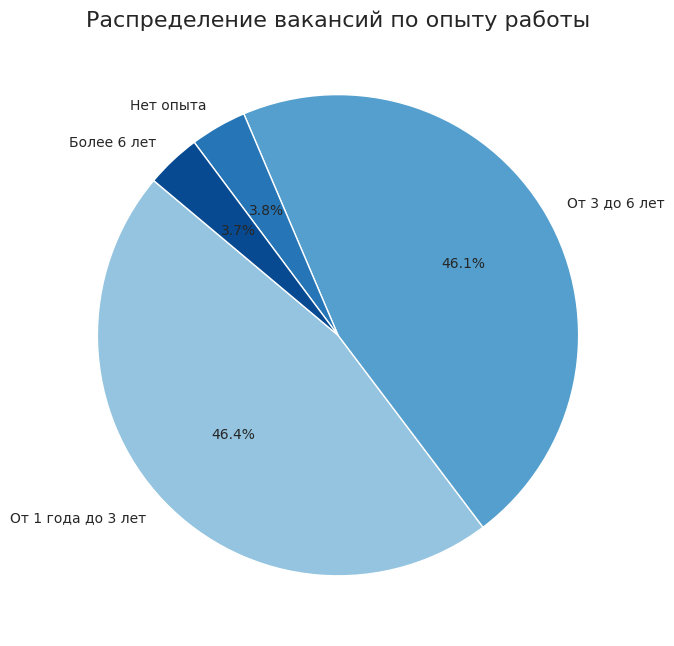

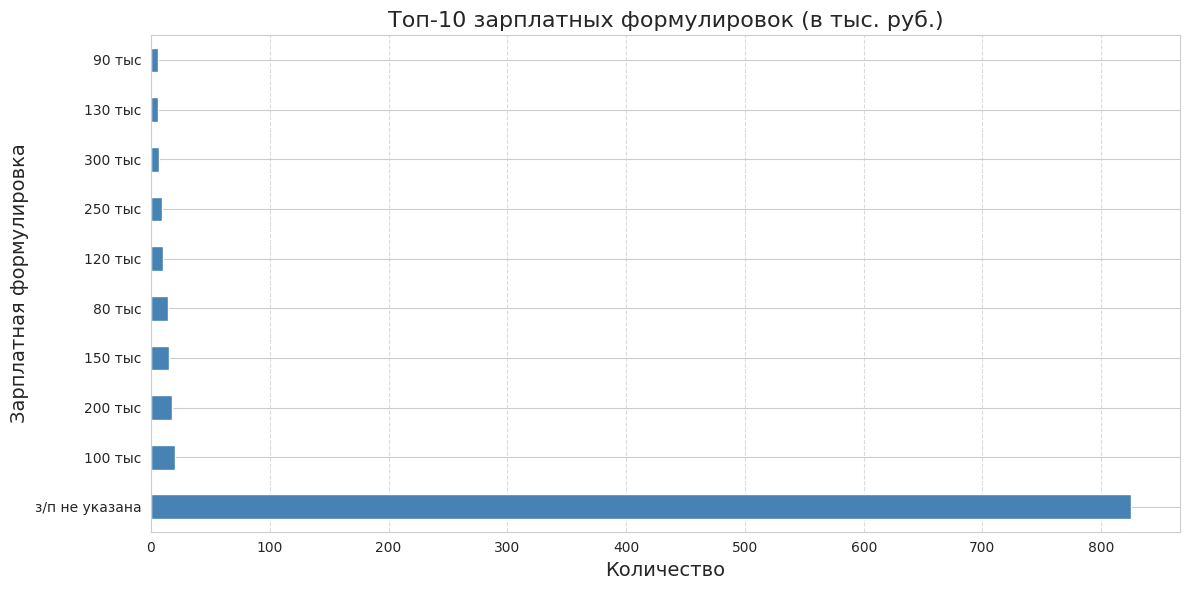

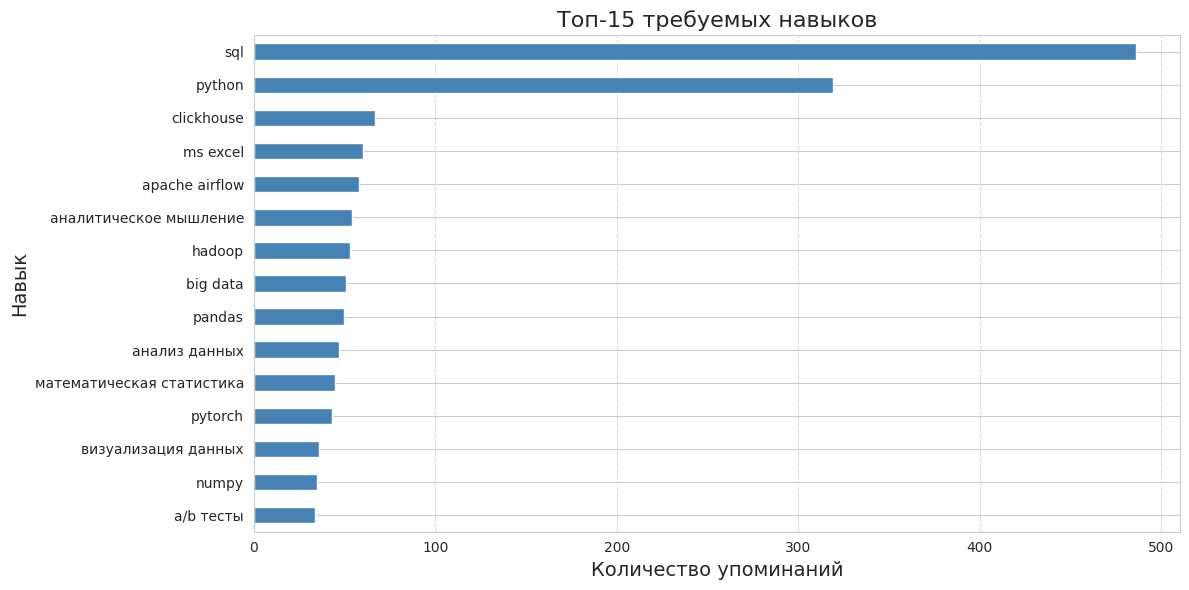

In [ ]:
import seaborn as sns
import numpy as np
import re
from collections import Counter

# Отключаем предупреждения по шрифтам
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Настройка шрифта и стиля
plt.rcParams.update({'font.family': 'Times New Roman'})
sns.set_style("whitegrid")

# --- 1. Круговая диаграмма по опыту ---
experience_counts = df['experience'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    experience_counts,
    labels=experience_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Blues(np.linspace(0.4, 0.9, len(experience_counts)))
)
plt.title('Распределение вакансий по опыту работы', fontsize=16)
plt.tight_layout()
plt.savefig('experience_pie.png', dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import re

# Подсчет самых частых формулировок зарплат
salary_counts = df['salary'].fillna('з/п не указана').value_counts().head(10)

# Преобразование длинных чисел в формат "тыс. руб."
def format_salary_label(label):
    match = re.search(r'(\d[\d\s]{3,})', label)
    if match:
        amount = int(match.group(1).replace(' ', ''))
        return label.replace(match.group(1), f"{amount // 1000} тыс")
    return label

# Применяем форматирование к подписям
salary_counts.index = salary_counts.index.map(format_salary_label)

# Построение графика
plt.figure(figsize=(12, 6))
salary_counts.plot(kind='barh', color='steelblue')
plt.title('Топ-10 зарплатных формулировок (в тыс. руб.)', fontsize=16)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Зарплатная формулировка', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('salary_labels_thousands.png', dpi=300)
plt.show()


# --- Обработка навыков: объединяем SQL и MS SQL под одним названием ---
skills_series = df['skills'].dropna().str.lower().str.replace('ms sql', 'sql')
skills_exploded = skills_series.str.split(';').explode().str.strip()
skills_exploded = skills_exploded.replace({'ms sql': 'sql', 'sql': 'sql'})

# Группируем все навыки, где встречается "sql", в одну категорию
def normalize_skill(skill):
    if 'sql' in skill:
        return 'sql'
    return skill

skills_normalized = skills_exploded.apply(normalize_skill)
top_skills_final = pd.Series(Counter(skills_normalized)).sort_values(ascending=False).head(15)

# --- Построение графика по навыкам ---
plt.figure(figsize=(12, 6))
top_skills_final.plot(kind='barh', color='steelblue')
plt.title('Топ-15 требуемых навыков', fontsize=16)
plt.xlabel('Количество упоминаний', fontsize=14)
plt.ylabel('Навык', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_skills_updated.png', dpi=300)
plt.show()


## GPT Preprocessing

In [ ]:
import pandas as pd

df=pd.read_csv('vacancies_30.csv')
# df

In [ ]:
import pandas as pd
import re
# from unidecode import unidecode

SYNONYM_MAP = {
    "python": ["питон", "пайтон", "python 3", "знание питона", "знание python", "знания python", "python продвинутый уровень"],
    "sql": ["ms sql", "postgresql", "mysql", "знание sql", "знания sql", "sql продвинутый уровень"],
    "машинное обучение": ["machine learning","ml"],
    "анализ данных": ["data analysis"],
    "excel": ["ms excel", "advanced excel"],
    "ab тесты": [r'a\s?[/-]?\s?b(\sтесты)?'],
    "aa тесты": [r'a\s?[/-]?\s?a(\sтесты)?'],

}

def normalize_text(text):
    if pd.isna(text):
        return ""

    # Приведение к нижнему регистру
    text = text.lower()
    text = re.sub(r"[_:()-]", " ", text)
    # Удаление спецсимволов
    text = re.sub(r"[^a-zа-яё0-9\s.,;/]", "", text)
    # Замена множественных пробелов на один
    text = re.sub(r"\s+", " ", text)
    return text.strip()

def replace_synonyms(text):
    """Замена синонимов по словарю"""
    for norm_term, variants in SYNONYM_MAP.items():
        for variant in variants:
            if variant.startswith('r"') or variant.startswith("r'"):
                pattern = variant[2:-1]  # Удаляем r'' или r""
            else:
                pattern = re.escape(variant)

            if re.search(rf"\b{pattern}\b", text, re.IGNORECASE):
                text = re.sub(rf"\b{pattern}\b", norm_term, text, flags=re.IGNORECASE)
    return text

def process_semilist(text, is_skills=False):
    """Обработка списков, разделенных точкой с запятой"""
    if pd.isna(text) or not text:
        return ""

    # Нормализация основного текста
    text = normalize_text(text)
    # Замена синонимов
    text = replace_synonyms(text)
    # Разделение элементов
    items = [item.strip() for item in text.split(';')]

    # Очистка каждого элемента
    processed_items = []
    for item in items:
        if not item:
            continue

        if is_skills:
            item = re.sub(r"[^a-zа-яё0-9\s/-]", "", item)

        item = item.strip(" ,.-")

        if item:
            processed_items.append(item)

    seen = set()
    unique_items = []
    for item in processed_items:
        if item not in seen:
            seen.add(item)
            unique_items.append(item)

    return "; ".join(unique_items)

# Обработка skills
df["skills"] = df["skills"].apply(
    lambda x: process_semilist(x, is_skills=True)
)

# Обработка requirements
df["requirement"] = df["requirement"].apply(
    lambda x: process_semilist(x)
)

# Обработка responsibilities
df["responsibility"] = df["responsibility"].apply(
    lambda x: process_semilist(x)
)

# Проверка результатов
sample_idx = 0
df


,id,city,company,industry,title,keywords,skills,experience,salary,url,created_at,responsibility,requirement
0,2303,Екатеринбург,М.Видео-Эльдорадо,"Розничная сеть (электроника, бытовая техника)",Аналитик данных (Екатеринбург),В Отдел анализа логистических процессов ищем...,excel; sql; python; power bi tableau; анализ д...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117580943,2025-03-07 12:39:09.004232,"анализ данных из различных источников, построе...",опыт работы с большим количеством данных от го...
1,2615,Екатеринбург,Марс,"Корма для животных (продвижение, оптовая торго...",Product Analyst (B2C) / Продуктовый аналитик (...,В нашу команду Ecosystem Growth необходим оп...,sql; a/b тесты; custdev; a/a тесты; user exper...,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/116767761,2025-03-07 12:39:09.004232,выполнять adhoc запросы средней трудоемкости п...,"опыт работы с b2c продуктами; sql, excel; опыт..."
2,2613,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Продуктовый аналитик (Екатеринбург),Ключевые задачи: Определение потенциального...,,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117860964,2025-03-07 12:39:09.004232,"определение потенциального объема клиентов, се...","высшее техническое, математическое, финансовое..."
3,2409,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Аналитик данных (Екатеринбург),Ключевые задачи: - Разработка и внедрение по...,,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/115077736,2025-03-07 12:39:09.004232,разработка и внедрение подходов к выявлению ин...,"высшее техническое, математическое, финансовое..."
4,2815,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Data Engineer / DWH Developer / Разработчик ХД...,Компания «АстраЗенека» верит в потенциал сво...,sql server ms integration services; ms analysi...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/107650857,2025-03-07 12:39:09.004232,разработка баз данных; оптимизация запросов; р...,"опыт разработки реляционных баз данных, умение..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2576,Екатеринбург,Яндекс,"Интернет-компания (поисковики, платежные систе...",Data scientist в поиск Маркета (Екатеринбург),Яндекс Маркет — это один из крупнейших маркетп...,,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/117144780,2025-03-07 12:39:09.004232,развивать машинное обучение модели ранжировани...,умеете писать на python; имеете практический о...
998,2632,Екатеринбург,Отм Ворлд Вайд,Разработка программного обеспечения,Продуктовый аналитик (Екатеринбург),билайн AdTech. ОТМ Ворлд Вайд. Мы успешно ре...,,От 1 года до 3 лет,NaN,https://hh.ru/vacancy/117509049,2025-03-07 12:39:09.004232,участвовать в формировании портфеля продуктов;...,работали на аналогичной позиции более 2х лет; ...
999,3228,Екатеринбург,Бизнес-Азимут,"Системная интеграция, автоматизации технологи...",Data Engineer (Екатеринбург),"“Бизнес-Азимут” – команда профессионалов, созд...",oracle; hadoop; teradata; sql; python; spark; ...,От 3 до 6 лет,300000,https://hh.ru/vacancy/117535075,2025-03-14 15:23:58.516781,разработка и оптимизация etl процессов на стек...,опыт работы с etl процессами от 3 лет; глубоки...
1000,3249,Екатеринбург,Бизнес-Азимут,"Системная интеграция, автоматизации технологи...",Data Engineer (Екатеринбург),"“Бизнес-Азимут” – команда профессионалов, созд...",dwh; teradata; greenplum; oracle; sql; apache ...,От 3 до 6 лет,300000,https://hh.ru/vacancy/118440349,2025-03-17 13:32:36.567615,"разработка и доработка витрин данных, процессо...",высшее техническое образование; опыт работы с ...


In [ ]:
gpt_vac=df[['id','title','skills','responsibility','requirement']].copy()

In [ ]:
gpt_vac.to_json('vac.json', orient='records', force_ascii=False, indent=4)

In [ ]:
prompt= """
You are an algorithm designed for extracting skills from text format
You will be provided with the text entitled "skills:","responsibility:","requirement:".
You are expected to output only the list of identified key skills, responsibilities and requirements that is needed by the vacancy.
You should NOT change the id and title, should NOT change order of the vacancies, should NOT skip any vacancy or create new one.
You should NOT make any changes for skills, exept deleting repeated skill names within one vacancy
(e.g. you will get: exel; sql; sql, you should keep: exel; sql).
You should combine related skills into one canonical form
(only for such examples as: ms sql; sql; sql language; sql продвинутый уровень. For such examples you shoul keep only
the shortest and most canonical form, for this example it will be "sql").

Key rules:
1. Extract ONLY concrete skills, responsibilities, requirements (avoid verbs like "демонстрировать", "определять","способен")
2. Combine related terms into single skills/ responsibilities/ requirements
3. Keep responsibilities, requirements concise (2-4 words max)

English input should be English output, Russian input should be Russian output.
Return only JSON. Apply to the whole file.

Here are a few examples of input texts and expected output for each of them:

<example>
Input:
[
    {
        "id":2303,
        "title":"Аналитик данных (Екатеринбург)",
        "skills":"excel; sql; python; power bi tableau; анализ данных; автоматизация бизнес процессов; бизнес анализ; оптимизация бизнес процессов; формирование аналитической отчетности",
        "responsibility":"анализ данных из различных источников, построение запросов; визуализация витрин с данными в bi инструментах; обновление и поддержание дашбордов в tableau; анализ и устранение проблем качества данных; ad hock запросы в рамках выполнения функциональных обязанностей; описание разработок",
        "requirement":"опыт работы с большим количеством данных от года в крупной компании; понимание основных бизнес процессов торговых или финансовых организаций; excel продвинутый пользователь; python от среднего уровня; sql уверенный уровень; tableau желательно; приветствуется опыт с sap bo, bw, erp, ewm, tm; знакомство с продуктами jira, confluence"
    },
    {
        "id":2615,
        "title":"Product Analyst (B2C) \/ Продуктовый аналитик (Екатеринбург)",
        "skills":"sql; a\/b тесты; custdev; a\/a тесты; user experience; визуализация данных",
        "responsibility":"выполнять adhoc запросы средней трудоемкости посещения страниц, кликабельность элементов, просмотры и кликабельность баннеров, предоставление данных для отчетов, расчет основных метрик retention, churn, dau, mau, воронки , app аналитика; выполнять adhoc запросы высокой трудоемкости поведенческие паттерны, исследования пост; релизные, оценка влияния рекламных кампаний, сегментация пользователей, анализ кост; эффективности продуктов, app аналитика; обрабатывать гипотезы, помогать в сборе статистики к гипотезам, приоритизировать, вести встречи, запускать гипотез, подводить результаты подсчет, инсайты; писать тз, валидировать тз от агентства, проверять разметки после релиза; искать узкие места в продуктах, давать рекомендации по улучшению, делать предиктивный анализ и оценку пользовательского опыта",
        "requirement":"опыт работы с b2c продуктами; sql, excel; опыт работы с яндекс метрикой; опыт работы с а\/б тестами и другими продуктовыми исследованиями; python; опыт работы с tableau либо power bi"
    },
    {
        "id":2613,
        "title":"Продуктовый аналитик (Екатеринбург)",
        "skills":"",
        "responsibility":"определение потенциального объема клиентов, сегмента электронной коммерции для банка; проведение тестирования внешних источников данных для встраивания в кредитный конвейер постановка гипотез, дизайн экспериментов, определение уровня риска, расчет unit экономики; изучение продуктового поведения потребителей, нахождение узких мест в процессе; оценка эффективности работы кредитного конвейера в различных сегментах; проведение риск; анализа, внесение предложений об улучшении текущего процесса; оценка потенциального эффекта от доработок технологий кредитования в области новых сегментов; проведение экспериментов и пилотов на данных, сравнение различных алгоритмов и интерфейсных решений",
        "requirement":"высшее техническое, математическое, финансовое или экономическое образование; опыт работы продуктовым или риск аналитиком не менее 2 лет; хорошее знание кредитных продуктов, их метрик и технологий кредитного конвейера желательно в сегменте мсб; высокий уровень владения sql для проведения сложной аналитики данных; опыт работы с bi инструментами; python и опыт его применения для анализа данных будет являться преимуществом; умение общаться с заказчиками и выявлять бизнес требования; умение аргументированно отстаивать свою точку зрения и готовность слышать и учитывать точки зрения ваших коллег"
    },
]

Output:
[
     {
        "id":2303,
        "title":"Аналитик данных (Екатеринбург)",
        "skills":"excel; sql; python; power bi tableau; анализ данных; автоматизация бизнес процессов; бизнес анализ; оптимизация бизнес процессов; формирование аналитической отчетности",
        "responsibility":"анализ данных из различных источников;
        построение запросов;
        визуализация витрин данных;
        bi инструменты;
        обновление и поддержание дашбордов;
        tableau;
        анализ и устранение проблем качества данных;
        ad hock;
        описание разработок",
        "requirement":
        "работа с данными;
         понимание основных бизнес процессов торговых или финансовых организаций;
         excel;
         python;
         sql;
         sap bo; bw; erp; ewm; tm;
         jira; confluence"
    },
    {
        "id":2615,
        "title":"Product Analyst (B2C) \/ Продуктовый аналитик (Екатеринбург)",
        "skills":"sql; a/b тесты; custdev; a/a тесты; user experience; визуализация данных",
        "responsibility":
        "adhoc;
        кликабельность элементов;
        просмотры и кликабельность баннеров;
        работа с данными;
        расчет метрик;
        retention;
        churn rate; dau; mau; воронки; app аналитика;
        поведенческие паттерны;
        оценка влияния рекламных кампаний;
        сегментация пользователей;
        анализ кост эффективности продуктов;
        проверка гипотез;
        сбор статистики;
        вести встречи;
        работа с тз;
        искать узкие места в продуктах;
        предиктивный анализ;
        оценка пользовательского опыта",
        "requirement":
        "работа с b2c продуктами; sql, excel;
        яндекс метрика;
        продуктовые исследования; python; tableau; power bi"
    },
    {
        "id":2613,
        "title":"Продуктовый аналитик (Екатеринбург)",
        "skills":"",
        "responsibility":
        "определить потенциальный объем клиентов;
         сегментирование;
         тестирование внешних источников данных;
         проверка гипотез;
         дизайн экспериментов;
         определение уровня риска;
         unit экономика;
         продуктовое поведение потребителей;
         оценка эффективности работы;
         анализ рисков;
         улучшение текущего процесса;
         оценка эффектов;
         эксперименты с данными;
         сравнение алгоритмов и интерфейсных решений",
        "requirement":
        "высшее техническое, математическое, финансовое или экономическое образование;
        продуктовый аналитик;
        риск аналитик;
        кредитные продукты;
        метрики;
        сегмент мсб;
        sql;
        аналитика данных;
        bi инструменты;
        python;
        общение с заказчиками;
        бизнес требования;
        аргументированно отстаивать точку зрения;
        слышать и учитывать точки зрения коллег"
    },
]

"""

In [ ]:
import json
import pandas as pd

with open('vac_prepared_19_04.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

vac = pd.DataFrame(data)

vac_full=pd.read_csv('vacancies_30.csv')

In [ ]:
vac_full=vac_full.drop(columns=['title','skills','responsibility','requirement'])

In [ ]:
# Объединение по 'id'
df_merged = pd.merge(vac, vac_full, on='id', how='inner')
df_merged.head()


,id,title,skills,responsibility,requirement,city,company,industry,keywords,experience,salary,url,created_at
0,2303,Аналитик данных (Екатеринбург),excel; sql; python; power bi tableau; анализ д...,анализ данных; построение запросов; визуализац...,анализ данных; бизнес процессы; excel; python;...,Екатеринбург,М.Видео-Эльдорадо,"Розничная сеть (электроника, бытовая техника)",В Отдел анализа логистических процессов ищем...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117580943,2025-03-07 12:39:09.004232
1,2615,Product Analyst (B2C) / Продуктовый аналитик (...,sql; a/b тесты; custdev; анализ поведения поль...,ad hoc; кликабельность элементов; кликабельнос...,работа с b2c продуктами; sql; excel; yandex me...,Екатеринбург,Марс,"Корма для животных (продвижение, оптовая торго...",В нашу команду Ecosystem Growth необходим оп...,От 3 до 6 лет,з/п не указана,https://hh.ru/vacancy/116767761,2025-03-07 12:39:09.004232
2,2613,Продуктовый аналитик (Екатеринбург),,потенциальный объем клиентов; сегментирование;...,"техническое, математическое, финансовое, эконо...",Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Ключевые задачи: Определение потенциального...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/117860964,2025-03-07 12:39:09.004232
3,2409,Аналитик данных (Екатеринбург),,выявление инцидентов мошенничества; анализ дан...,высшее образование; опыт антифрод или риск ана...,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Ключевые задачи: - Разработка и внедрение по...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/115077736,2025-03-07 12:39:09.004232
4,2815,Data Engineer / DWH Developer / Разработчик ХД...,sql; ms integration services; ms analysis serv...,разработка баз данных; sql; табулярные модели ...,базы данных; план запроса; индексы и структуры...,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Компания «АстраЗенека» верит в потенциал сво...,От 1 года до 3 лет,з/п не указана,https://hh.ru/vacancy/107650857,2025-03-07 12:39:09.004232


In [ ]:
df_merged.to_csv('vac_final.csv')

In [ ]:
!pip install -U pymorphy2 nltk langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3820eabcc961d5f5d0609739dade955eb942dbaa8b61a9b925a2716f9b6357af
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2eb0709081bba5f3bc11c1551f4fa07f7d33a7d4f66ab7762bcd8a8da2f77feb
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built langdetect docopt


In [ ]:
!pip install pymorphy2 nltk
!pip install pymorphy2-dicts-ru  # Словари для pymorphy2

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from pymorphy2 import MorphAnalyzer
import re

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm

import spacy
nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    if not isinstance(text, str):
        return text

    # Определяем язык (простая эвристика)
    lang = 'ru' if any(cyr in text for cyr in 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя') else 'en'
    doc = nlp_ru(text) if lang == 'ru' else nlp_en(text)

    return ' '.join([token.lemma_ for token in doc])

# Применяем к столбцам
df_merged['responsibility'] = df_merged['responsibility'].apply(lemmatize_text)
df_merged['requirement'] = df_merged['requirement'].apply(lemmatize_text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 950.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
"""
You are a text standardization algorithm specialized in skill ontology development.
Your task is to process CSV file containing job vacancy data to create a unified competency dictionary.

Input:
- CSV file with columns: skills, responsibility, requirement
- Text data contains mixed Russian/English terms with varying formulations

Processing steps:
1. EXTRACTION:
   - Parse all text from the three target columns
   - Split compound entries (separated by ';' and /) into individual terms
   - Remove stopwords but preserve technical terms

2. NORMALIZATION:
   - Convert all terms to lowercase
   - Remove punctuation except special characters needed for technical terms (like 'C++')
   - Handle both Russian and English terms appropriately

4. TERM CLUSTERING:
   - Group terms by conceptual similarity using these rules:
     a) Spelling variations (incl. typos)
     b) Abbreviations/short forms
     c) Linguistic variants (active/passive voice)
     d) Technical synonyms
     e) Tool-specific implementations
e.g. "ab тестирование", "bayesian a/b тестирование" and "ab тесты" is one concept,
canonical will be "a/b тесты",
"bi": [
      "bi",
      "bi аналитика",
      "bi инструменты",
      "bi инструментарий",
      "bi отчетность",
      "bi отчеты",
      "bi платформы",
      "bi решения",
      "bi система",
      "bi системы",
      "business intelligence",
      "business intelligence systems"]
      is the same concept as "power bi" and "bi tools"


3. STANDARDIZATION:
   For each unique concept identified:
   a) Create a dictionary entry where:
      - KEY: Most canonical formulation (prioritize:
        1. Industry-standard terms
        2. Most frequent formulation
        3. Most precise and short technical term)
      - VALUE: List of all alternative formulations found

   b) Special cases:
      - Map different programming language versions to base form (Python 3 → Python)
      - Standardize tool names (ms sql → sql)
      - Normalize skill levels (Basic knowledge of python. → python)

5. OUTPUT:
   - Produce 2 dictionaries. One with frequency count, order by frequency.
   The second one - common dictionary lower case of all concepts from the file.
   The second one should show FULL JSON!

Format requirements:
- Use JSON structure
- Preserve Russian language for terms, except the special terms and abbriviations in english
(e.g. keep "машинное обучение" instead of "machine learning" but "python" instead of "питон")
- Preserve the lower case
- Include frequency counts for variants
- Flag ambiguous terms for human review

Example transformation:
Input:
"знание Excel; Google Sheets; анализ данных; python; теорвер; a/b тестирование;
etl запросы; язык программирования c; ml; bi системы; знание sql; мат стат",

"ms excel; знание python; теор вер; статистика; bi; sql запросы; статистика;
ad hock аналитика; a/b тесты; поведение пользователей; c; dwh; greenplum; проектное управление"

"python language; power bi; sql (опыт); реляционные бд; математическая статистика; adhoc;
a/b тесты; анализ пользовательского поведения; c++; продуктовые стратегии; unit экономика; дашборды"

"postgresql; субд; математическая статистика; ad hoc; a/b тестирование; анализ поведения пользователей;
портфель продуктов; продуктовая аналитика; тз; документация"

Output: {
  "excel": ["excel", "google sheets", "ms excel"],
  "анализ данных": ["анализ данных", "data analysis","аналитика данныъ"],
  "python": ["знание python", "python language],
  "теория вероятности":["теорвер", "теор вер"],
  "power bi":["bi","bi системы","power bi"],
  "sql":["знание sql","sql (...)", "ms sql","postgresql","субд","субд и хранилища данных",
  "реляционные бд", "бд","б.д."],
  "математическая статистика":["математическая статистика", "статистика","мат стат",
  "мат. стат", "statistics"],
  "ad hoc":["ad hoc", "ad hoc analysis", "ad hock", "adhock аналитика", "adhoc аналитика",
  "adhock","adhoc"],
  "a/b тесты":["a/b тесты", "провередние a/b тестов", "a/b тестирование", "опыт a/b тестов",
  "a/b"],
  "etl":["etl","etl запросы"],
  "c++":["c++", "язык программирования c++", "язык программирования c", "c","c+","язык c",
  "язык c++", "программирование c++"],
  "тестирование гипотез":["тестирование гипотез", "гипотезы", "проверка гипотез"],
  "поведение пользователей":["поведение пользователей", "анализ поведения пользователей", "пользовательское поведение"],
  "машинное обучение":["машинное обучение","ml","machine learning", "mlops"],
  "рекомендательные системы":["рекомендательные системы","система рекомендаций", "рекомендации",
  "recsys", "recommender systems", "recommendation systems"],
  "временные ряды":["временные ряды","анализ временных рядов"],
  "kubernetes":["kubernetes","k8s"],
  "продуктовая аналитика":["продуктовая аналитика"],
  "unit экономика":["unit экономика"],
  "проектное управление":["проектное управление]

  etc...
}
"""

In [ ]:
"""
In the previous step, we extracted raw competences from 3 sourses of data - vacancies, online courses, education programme
by developing dictionaries for each of them seperately.
Your task now is to create unified normalized dictionary for the terms to maintain consistent terminology
and make it easier to use it for semantic simmilarity on graph.
You are provided with 3 dictionaries with competencies where the key is the Most canonical formulation and value
is a list of all alternative formulations found for each dataset.
You are expected to combine all alternative formulations from 3 sourses of data under unique key.
You should ombine dictionaries taking into account that the names of the keys may differ,
reduce the key to one unique.

# Vacancies Embeddings

In [ ]:
df=df_merged.copy()

In [ ]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer
import numpy as np

# Функция очистки текста
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^\w\s.,;!?]', '', str(text))
    return text.strip()

# Инициализация модели
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Функция для разделения и создания эмбеддингов
def process_column(text, model):
    if pd.isna(text): return []
    items = [clean_text(item) for item in str(text).split(';') if item.strip()]
    if not items: return []
    return model.encode(items)

# Обработка всех колонок
df['skills_embeddings'] = df['skills'].apply(lambda x: process_column(x, model))
df['requirement_embeddings'] = df['requirement'].apply(lambda x: process_column(x, model))
df['responsibility_embeddings'] = df['responsibility'].apply(lambda x: process_column(x, model))

# Сохранение (эмбеддинги как строки с разделителем |)
def embeddings_to_string(embeddings):
    return '|'.join([','.join(map(str, emb)) for emb in embeddings])

df['skills_embeddings_str'] = df['skills_embeddings'].apply(embeddings_to_string)
df['requirement_embeddings_str'] = df['requirement_embeddings'].apply(embeddings_to_string)
df['responsibility_embeddings_str'] = df['responsibility_embeddings'].apply(embeddings_to_string)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df.to_csv('vac_final_emb.csv')

# Crosstab

In [ ]:
import pandas as pd

vacancies_df = pd.read_csv('vac_final_emb.csv')  # путь к вашему файлу с вакансиями
education_df = pd.read_csv('ep_final_emb.csv')  # путь к вашему файлу с программой
# courses_df=pd.read_csv('mooc_final.csv')

In [ ]:
vacancies_df.head()

,Unnamed: 0,id,title,skills,responsibility,requirement,city,company,industry,keywords,...,url,created_at,skills_embeddings,requirement_embeddings,responsibility_embeddings,skills_embeddings_str,requirement_embeddings_str,responsibility_embeddings_str,skills_emb_list,skills_items
0,0,2303,Аналитик данных (Екатеринбург),excel; sql; python; power bi tableau; анализ д...,анализ данных; построение запросов; визуализац...,анализ данных; бизнес процессы; excel; python;...,Екатеринбург,М.Видео-Эльдорадо,"Розничная сеть (электроника, бытовая техника)",В Отдел анализа логистических процессов ищем...,...,https://hh.ru/vacancy/117580943,2025-03-07 12:39:09.004232,[[-0.1777971 -0.12218866 -0.01011875 ... 0.0...,[[-0.1957956 0.24234793 -0.01164079 ... 0.0...,[[-0.19579563 0.2423479 -0.01164079 ... 0.0...,"-0.1777971,-0.122188665,-0.01011875,0.04036677...","-0.1957956,0.24234793,-0.011640789,0.053615727...","-0.19579563,0.2423479,-0.011640788,0.053615727...","[[-0.1777971, -0.122188665, -0.01011875, 0.040...","[excel, sql, python, power bi tableau, анализ ..."
1,1,2615,Product Analyst (B2C) / Продуктовый аналитик (...,sql; a/b тесты; custdev; анализ поведения поль...,ad hoc; кликабельность элементов; кликабельнос...,работа с b2c продуктами; sql; excel; yandex me...,Екатеринбург,Марс,"Корма для животных (продвижение, оптовая торго...",В нашу команду Ecosystem Growth необходим оп...,...,https://hh.ru/vacancy/116767761,2025-03-07 12:39:09.004232,[[-0.13562381 0.3216052 -0.01457257 ... 0.0...,[[ 0.03331941 0.0201245 -0.01469554 ... -0.0...,[[-0.02608334 -0.20160258 -0.01273311 ... 0.0...,"-0.13562381,0.3216052,-0.014572572,0.116422884...","0.033319414,0.0201245,-0.01469554,0.016476188,...","-0.026083339,-0.20160258,-0.012733106,0.062415...","[[-0.13562381, 0.3216052, -0.014572572, 0.1164...","[sql, a/b тесты, custdev, анализ поведения пол..."
2,2,2613,Продуктовый аналитик (Екатеринбург),NaN,потенциальный объем клиентов; сегментирование;...,"техническое, математическое, финансовое, эконо...",Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Ключевые задачи: Определение потенциального...,...,https://hh.ru/vacancy/117860964,2025-03-07 12:39:09.004232,[],[[-0.18876934 0.06156772 -0.0147386 ... 0.0...,[[ 0.01922989 0.11825716 -0.01683023 ... 0.0...,NaN,"-0.18876934,0.06156772,-0.014738596,-0.0575656...","0.01922989,0.11825716,-0.01683023,-0.026810342...",[],[]
3,3,2409,Аналитик данных (Екатеринбург),NaN,выявление инцидентов мошенничества; анализ дан...,высшее образование; опыт антифрод или риск ана...,Екатеринбург,ПСБ (ПАО «Промсвязьбанк»),Банк,Ключевые задачи: - Разработка и внедрение по...,...,https://hh.ru/vacancy/115077736,2025-03-07 12:39:09.004232,[],[[-0.09869971 0.12438854 -0.01551863 ... 0.0...,[[ 0.0585479 0.12964591 -0.01780448 ... 0.0...,NaN,"-0.09869971,0.12438854,-0.015518626,-0.1044495...","0.058547903,0.12964591,-0.01780448,0.12158243,...",[],[]
4,4,2815,Data Engineer / DWH Developer / Разработчик ХД...,sql; ms integration services; ms analysis serv...,разработка баз данных; sql; табулярные модели ...,базы данных; план запроса; индексы и структуры...,Екатеринбург,АстраЗенека,Фармацевтическая продукция (производство),Компания «АстраЗенека» верит в потенциал сво...,...,https://hh.ru/vacancy/107650857,2025-03-07 12:39:09.004232,[[-0.13562381 0.3216052 -0.01457257 ... 0.0...,[[-0.08121862 0.28949183 -0.01465257 ... -0.0...,[[-0.06905356 0.33421525 -0.01296223 ... -0.0...,"-0.13562381,0.3216052,-0.014572572,0.116422884...","-0.081218615,0.28949183,-0.014652574,0.1410871...","-0.06905356,0.33421525,-0.01296223,0.11269313,...","[[-0.13562381, 0.3216052, -0.014572572, 0.1164...","[sql, ms integration services, ms analysis ser..."


In [ ]:
education_df['annotation_emb'].to_json('ep.json')  # Пример одного значения


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# ----------------------------------------------------
# Функции для парсинга эмбеддингов
# ----------------------------------------------------

def parse_embedding_simple(s: str) -> np.ndarray:
    if not isinstance(s, str) or s.strip() == "":
        return np.array([])
    return np.array([float(x) for x in s.split(',')])

# 2) разбиваем строку "emb1|emb2|emb3" → [emb1, emb2, emb3]
def parse_module_embeddings(s: str) -> list[np.ndarray]:
    if not isinstance(s, str) or s.strip() == "":
        return []
    parts = s.split('|')
    return [parse_embedding_simple(p) for p in parts if parse_embedding_simple(p).size > 0]

# усредняем векторы по модулю
def aggregate_module(embs: list[np.ndarray]) -> np.ndarray:
    if not embs:
        return np.array([])
    return np.mean(embs, axis=0)

# ----------------------------------------------------
# Обработка education_df
# ----------------------------------------------------

education_df['emb_list'] = education_df['annotation_emb'].apply(parse_module_embeddings)
education_df['module_emb'] = education_df['emb_list'].apply(aggregate_module)

# ----------------------------------------------------
# Обработка vacancies_df
# ----------------------------------------------------

for col in ['skills', 'requirement', 'responsibility']:
    col_str = f"{col}_embeddings_str"
    col_list = f"{col}_emb_list"
    vacancies_df[col_list] = (
        vacancies_df[col_str]
        .fillna("")
        .apply(lambda s: [parse_embedding_simple(x) for x in s.split('|') if x.strip()])
    )

# ----------------------------------------------------
# Сравнение и построение crosstab
# ----------------------------------------------------

comparison_results = {}

for col in ['skills', 'requirement', 'responsibility']:
    rows = []
    for _, vrow in vacancies_df.iterrows():
        vid = vrow['id']
        items = [t.strip() for t in str(vrow[col]).split(';') if t.strip()]
        embs  = vrow[f"{col}_emb_list"]
        for text, emb in zip(items, embs):
            if emb.size == 0:
                continue
            row = {'vacancy_id': vid, 'skill': text}
            for _, mrow in education_df.iterrows():
                mn = mrow['Module_name']
                mlist = mrow['emb_list']
                if not mlist:
                    sim = 0.0
                else:
                    sims = cosine_similarity([emb], mlist)[0]
                    sim = float(sims.max())
                row[mn] = round(sim, 4)
            rows.append(row)
    comparison_results[col] = pd.DataFrame(rows)

# ----------------------------------------------------
# Добавляем частоту + среднее покрытие
# ----------------------------------------------------

skill_counter = Counter()
for section in ['skills', 'requirement', 'responsibility']:
    skill_counter.update(comparison_results[section]['skill'])

# Объединяем всё в один DataFrame
combined_df = pd.concat([comparison_results[s] for s in ['skills', 'requirement', 'responsibility']], ignore_index=True)

# Группируем по навыкам и берём среднее покрытие
coverage_df = combined_df.groupby('skill').mean().reset_index()

# Добавляем частоту встречаемости
coverage_df.insert(1, 'frequency', coverage_df['skill'].map(skill_counter))

# Сортируем по убыванию
coverage_df = coverage_df.sort_values(by='frequency', ascending=False)

# ----------------------------------------------------
# Запись в Excel
# ----------------------------------------------------

with pd.ExcelWriter('vacancies_vs_education_with_frequency.xlsx') as writer:
    # Финальная таблица с частотой + покрытием
    coverage_df.to_excel(writer, sheet_name='coverage_with_frequency', index=False)

    # Исходные таблицы по разделам
    for sheet, df_tab in comparison_results.items():
        df_tab.to_excel(writer, sheet_name=sheet, index=False)


In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd
coverage_df=pd.read_csv('coverage_df.csv')

In [ ]:
coverage_df

,Unnamed: 0,skill,frequency,vacancy_id,Архитектура программного обеспечения,Бизнес-применение машинного обучения,Большие данные и искусственный интеллект,Визуализация данных,Коммуникации на иностранном языке,Операционные системы и языки программирования,...,Промышленная разработка программного обеспечения,Развитие Softskills,Разработка ИТ-проекта,Спортивный анализ данных,Углубленное программирование на Python,Управление проектами,"Учебная практика, проектно-технологическая",Философия и методология науки,Цифровые компетенции в научной деятельности,Этика искусственного интеллекта
0,1196,sql,1155,2765.886580,1.0000,0.2691,0.6919,0.2734,0.3841,0.4114,...,0.2931,0.1822,0.3034,0.4496,0.4841,0.3034,0.2314,0.1708,0.2219,0.2102
1,1010,python,972,2789.363169,0.3258,0.2176,1.0000,1.0000,0.2793,1.0000,...,0.3191,0.2275,0.3074,0.2844,1.0000,0.3074,0.2698,0.2788,0.2393,0.2473
2,1553,анализ данных,331,2711.655589,1.0000,0.5697,1.0000,0.6845,0.8461,1.0000,...,0.5115,0.4654,0.5564,1.0000,0.6969,0.5564,0.5524,0.4915,0.5598,0.3755
3,950,power bi,312,2734.266026,0.3315,0.2135,0.3249,0.3446,0.3358,0.3774,...,0.3580,0.3424,0.3874,0.2863,0.2793,0.3874,0.3066,0.2677,0.2995,0.3160
4,3137,машинное обучение,294,2778.418367,0.4457,1.0000,0.4490,0.3330,0.3418,0.4457,...,1.0000,0.5372,0.3160,0.4457,1.0000,0.3078,0.4406,0.2293,0.2905,0.4892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,2410,генерация меморандумов,1,2528.000000,0.6267,0.4328,0.7524,0.6461,0.6535,0.5042,...,0.5640,0.4965,0.6407,0.6816,0.4202,0.5497,0.5590,0.5985,0.6276,0.5256
6060,2409,генерация кредитных меморандумов и рекомендаци...,1,2687.000000,0.3526,0.4508,0.3526,0.2061,0.5996,0.3612,...,0.4295,0.2500,0.4557,0.3730,0.3214,0.4264,0.3422,0.3495,0.4822,0.3915
6061,2408,генерация кандидатов,1,2924.000000,0.3773,0.4965,0.5883,0.4207,0.4291,0.4114,...,0.3989,0.3558,0.4035,0.4885,0.2521,0.3959,0.4030,0.3829,0.5488,0.3996
6062,2407,генерация идей по оптимизации реализованных ка...,1,3262.000000,0.4352,0.5035,0.4001,0.2949,0.4422,0.3572,...,0.5372,0.4091,0.5591,0.6338,0.3473,0.5587,0.4500,0.3407,0.6243,0.4587


In [ ]:
df=coverage_df.copy()

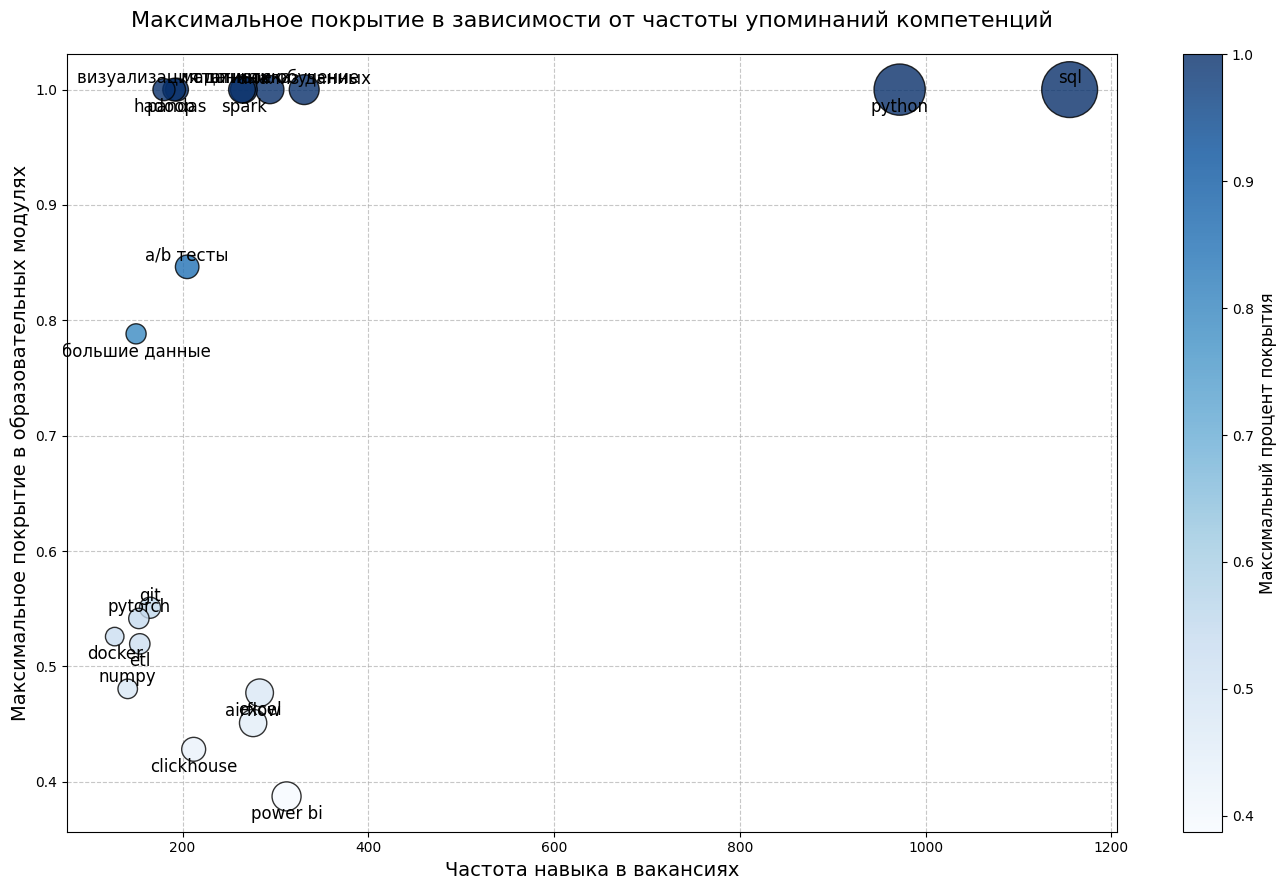

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# топ-20 по частоте
top_skills = df.nlargest(20, 'frequency').copy()

# Вычисляем максимальный процент покрытия по направлениям
percent_cols = df.columns[4:]
top_skills['max_coverage'] = top_skills[percent_cols].max(axis=1)

plt.figure(figsize=(14, 9))

# Отображаем сетку под пузырями
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Построение пузырей
sc = plt.scatter(
    top_skills['frequency'],
    top_skills['max_coverage'],
    s=top_skills['frequency'] * 1.4,      # Увеличенный размер пузырей
    c=top_skills['max_coverage'],         # Цвет по макс. покрытию
    cmap='Blues',
    alpha=0.8,
    edgecolors='k',
    zorder=3                               # Поверх сетки
)

for i, row in top_skills.iterrows():
    y_offset = 0.01 if i % 2 == 0 else -0.015
    plt.text(
        row['frequency'],
        row['max_coverage'] + y_offset,    # Смещаем по вертикали
        row['skill'],
        fontsize=12,
        ha='center',
        va='center'
    )

# Цветовая шкала справа
cbar = plt.colorbar(sc)
cbar.set_label('Максимальный процент покрытия', fontsize=12)

# Оформление осей и заголовка
# Оформление осей и заголовка
plt.xlabel('Частота навыка в вакансиях', fontsize=14)
plt.ylabel('Максимальное покрытие в образовательных модулях', fontsize=14)
plt.title('Максимальное покрытие в зависимости от частоты упоминаний компетенций', fontsize=16, pad=20)

plt.tight_layout()
plt.show()


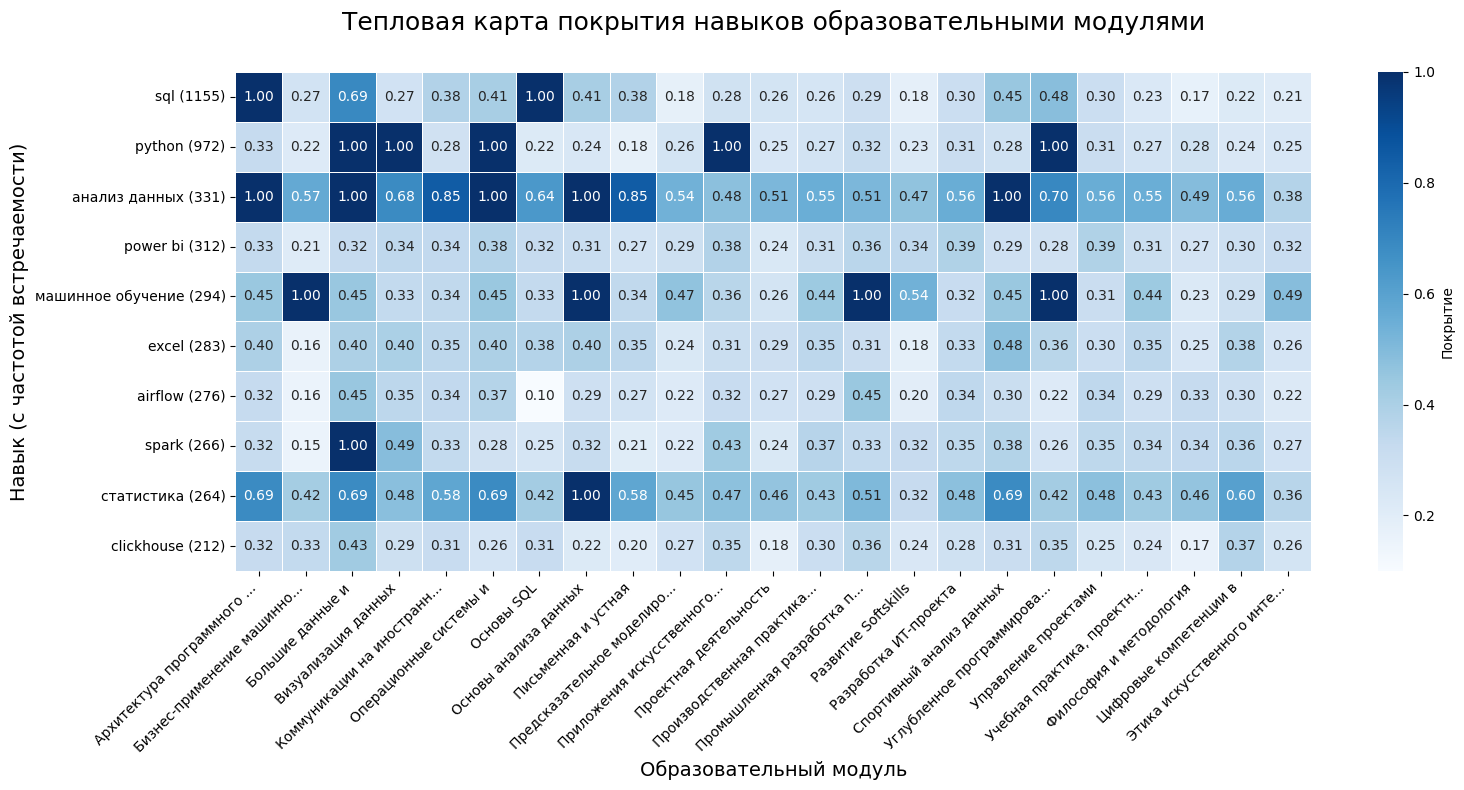

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Выбираем топ-10 навыков
top_10 = coverage_df.sort_values(by='frequency', ascending=False).head(10).copy()

# 2. Добавляем частоту к названию навыка
top_10['skill_with_freq'] = top_10['skill'] + ' (' + top_10['frequency'].astype(str) + ')'

# 3. Сокращаем названия модулей
def shorten(name, max_words=3, max_len=25):
    words = name.split()
    short = ' '.join(words[:max_words])
    if len(short) > max_len:
        short = short[:max_len] + '...'
    return short

module_columns = [col for col in top_10.columns if col not in ['Unnamed: 0', 'skill', 'frequency', 'vacancy_id', 'skill_with_freq']]
short_module_names = {col: shorten(col) for col in module_columns}

# 4. Формируем таблицу
heatmap_data = top_10.set_index('skill_with_freq')[module_columns]
heatmap_data.rename(columns=short_module_names, inplace=True)

# 5. Построение тепловой карты
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Покрытие'})

# Больше отступа для заголовка
plt.title('Тепловая карта покрытия навыков образовательными модулями', fontsize=18, pad=30)

plt.xlabel('Образовательный модуль', fontsize=14)
plt.ylabel('Навык (с частотой встречаемости)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-42-5f3a1745ec60>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(skills, rotation=45, ha='right')


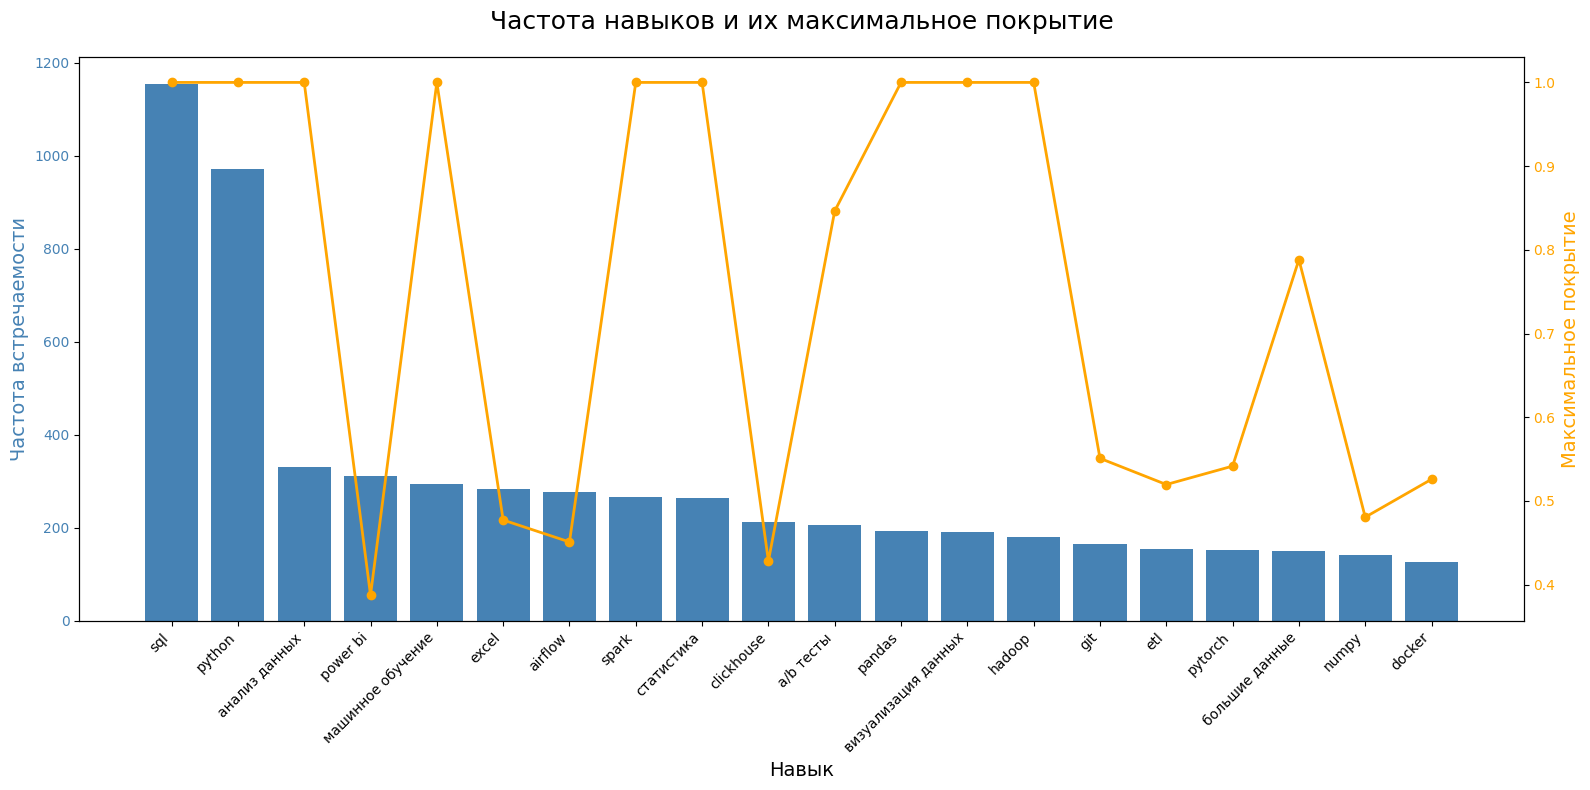

In [ ]:
import matplotlib.pyplot as plt

# Подготовка данных
top_20 = coverage_df.sort_values(by='frequency', ascending=False).head(20).copy()
module_columns = [col for col in top_20.columns if col not in ['Unnamed: 0', 'skill', 'frequency', 'vacancy_id']]
top_20['max_coverage'] = top_20[module_columns].max(axis=1)

skills = top_20['skill']

# Построение
fig, ax1 = plt.subplots(figsize=(16, 8))

# Столбики для частоты
color = 'steelblue'
ax1.set_xlabel('Навык', fontsize=14)
ax1.set_ylabel('Частота встречаемости', color=color, fontsize=14)
ax1.bar(skills, top_20['frequency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(skills, rotation=45, ha='right')

# Линия для максимального покрытия (оранжевая!)
ax2 = ax1.twinx()  # вторая ось Y
color = 'orange'
ax2.set_ylabel('Максимальное покрытие', color=color, fontsize=14)
ax2.plot(skills, top_20['max_coverage'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Общий заголовок
plt.title('Частота навыков и их максимальное покрытие', fontsize=18, pad=20)
fig.tight_layout()
plt.show()


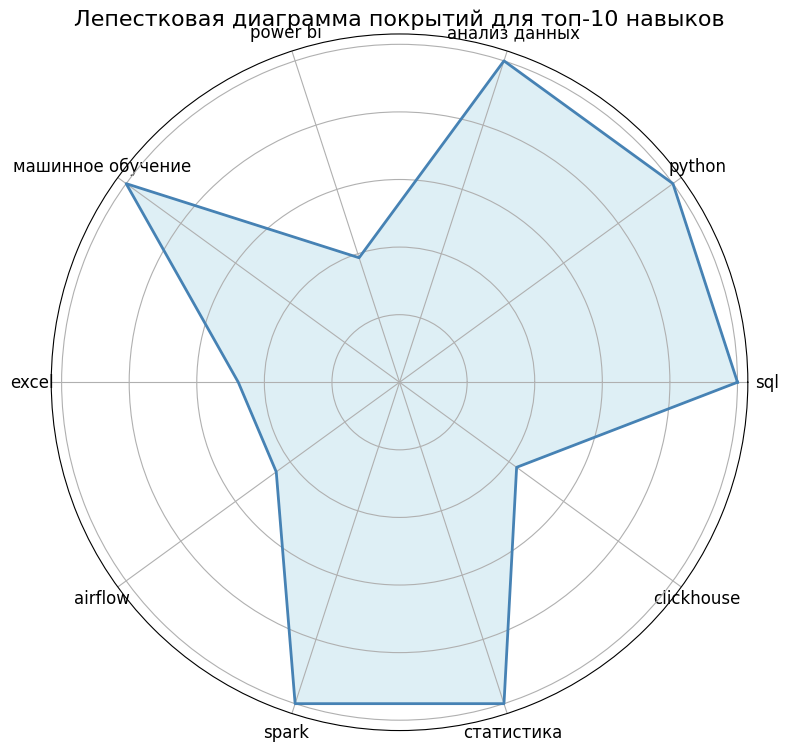

In [ ]:
import numpy as np

# Топ-5 навыков
top_5 = top_20.head(10)

# Углы для каждого луча
categories = top_5['skill']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Значения
values = top_5['max_coverage'].tolist()
values += values[:1]

# Построение лепестка
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='steelblue', linewidth=2)
ax.fill(angles, values, color='lightblue', alpha=0.4)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_title('Лепестковая диаграмма покрытий для топ-10 навыков', size=16)
plt.tight_layout()
plt.show()


In [ ]:
coverage_df.to_csv('coverage_df.csv')

In [ ]:
filled_counts = vacancies_df[['skills', 'responsibility', 'requirement']].notna().sum()
print(filled_counts)


skills            657
responsibility    988
requirement       991
dtype: int64


In [ ]:
# df=pd.read_excel('vacancies_vs_education.xlsx')
df

""


In [ ]:
import pandas as pd

# Группировка по вакансии и расчет среднего значения по каждой дисциплине
grouped = df.groupby("vacancy_id").mean(numeric_only=True)

# Максимальное покрытие дисциплиной
grouped["max_coverage"] = grouped.max(axis=1)

# Фильтрация по ≥ 0.5
covered = grouped[grouped["max_coverage"] >= 0.5]

# Вывод вакансий и процентов покрытия
result = covered[["max_coverage"]].reset_index()
result.columns = ["vacancy_id", "coverage_percent"]
result["coverage_percent"] = (result["coverage_percent"] * 100).round(2)

result


,vacancy_id,coverage_percent
0,2231,54.95
1,2232,67.04
2,2233,74.28
3,2234,66.57
4,2235,54.60
...,...,...
974,3397,63.61
975,3399,61.50
976,3402,56.28
977,3403,56.24


In [ ]:
import pandas as pd

# Загрузка Excel-файла с тремя листами
xls = pd.read_excel("vacancies_vs_education.xlsx", sheet_name=None)

# Функция для обработки (без skills, только coverage_percent)
def process_sheet_coverage_only(df):
    grouped = df.groupby("vacancy_id").mean(numeric_only=True)
    grouped["max_coverage"] = grouped.max(axis=1)
    covered = grouped[grouped["max_coverage"] >= 0.5]
    result = covered[["max_coverage"]].reset_index()
    result.columns = ["vacancy_id", "coverage_percent"]
    result["coverage_percent"] = (result["coverage_percent"] * 100).round(2)
    return result

# Обработка и вывод
for name, df in xls.items():
    print(f"\n=== {name.upper()} ===")
    display(process_sheet_coverage_only(df))



=== SKILLS ===


,vacancy_id,coverage_percent
0,2231,73.93
1,2233,61.36
2,2234,84.60
3,2235,57.61
4,2236,70.76
...,...,...
633,3393,59.20
634,3397,60.77
635,3399,51.47
636,3402,80.98



=== REQUIREMENT ===


,vacancy_id,coverage_percent
0,2231,62.13
1,2232,66.46
2,2233,63.24
3,2234,66.65
4,2235,56.48
...,...,...
947,3397,67.85
948,3399,50.28
949,3402,72.05
950,3403,60.02



=== RESPONSIBILITY ===


,vacancy_id,coverage_percent
0,2231,54.95
1,2232,67.04
2,2233,74.28
3,2234,66.57
4,2235,54.60
...,...,...
974,3397,63.61
975,3399,61.50
976,3402,56.28
977,3403,56.24


In [ ]:
import pandas as pd

# Список колонок с дисциплинами
discipline_cols = df.columns[2:]

# Группируем по vacancy_id и считаем среднее по дисциплинам
grouped = df.groupby("vacancy_id")[discipline_cols].mean()

# Считаем максимальное покрытие по дисциплинам
grouped["max_coverage"] = grouped.max(axis=1)

# Фильтруем вакансии с покрытием ≥ 0.5
covered_vacancies = grouped[grouped["max_coverage"] >= 0.5].index

# Берем исходные строки с этими vacancy_id
filtered_df = df[df["vacancy_id"].isin(covered_vacancies)].copy()

# Добавим колонку с max coverage для каждой строки (по её вакансии)
filtered_df["coverage_percent"] = filtered_df["vacancy_id"].map(
    grouped["max_coverage"]
)
filtered_df["coverage_percent"] = (filtered_df["coverage_percent"] * 100).round(2)

# Выводим vacancy_id, skill, coverage_percent
result = filtered_df[["vacancy_id", "skill", "coverage_percent"]]

result


,vacancy_id,skill,coverage_percent
0,2303,анализ данных,61.11
1,2303,построение запросов,61.11
2,2303,визуализация данных,61.11
3,2303,power bi,61.11
4,2303,обновление дашбордов,61.11
...,...,...,...
6251,3334,создание datasetов,73.75
6252,3334,datalens,73.75
6253,3334,витрины данных,73.75
6254,3334,аналитические отчеты,73.75


In [ ]:
import pandas as pd

# Загружаем все листы из файла
xls = pd.read_excel("vacancies_vs_online_courses.xlsx", sheet_name=None)

# Функция обработки одного листа
def process_sheet(df):
    # Убедимся, что колонка "vacancy_id" есть и колонка "skill"
    discipline_cols = df.columns[2:]

    # Группировка по vacancy_id — среднее по дисциплинам
    grouped = df.groupby("vacancy_id")[discipline_cols].mean()

    # Максимальное покрытие по дисциплинам
    grouped["max_coverage"] = grouped.max(axis=1)

    # Фильтруем вакансии с покрытием ≥ 0.5
    covered_vacancies = grouped[grouped["max_coverage"] >= 0.5].index

    # Фильтруем исходные строки
    filtered_df = df[df["vacancy_id"].isin(covered_vacancies)].copy()

    # Добавляем колонку покрытия
    filtered_df["coverage_percent"] = filtered_df["vacancy_id"].map(
        grouped["max_coverage"]
    )
    filtered_df["coverage_percent"] = (filtered_df["coverage_percent"] * 100).round(2)

    # Только нужные колонки
    return filtered_df[["vacancy_id", "skill", "coverage_percent"]]

# Обработка всех листов
results = {}
for sheet_name, df in xls.items():
    results[sheet_name] = process_sheet(df)

# Пример: доступ к результату для листа "skills"
results["skills"]
# Аналогично можно вывести для "requirement" и "responsibility"


,vacancy_id,skill,coverage_percent
0,2303,excel,61.63
1,2303,sql,61.63
2,2303,python,61.63
3,2303,power bi tableau,61.63
4,2303,анализ данных,61.63
...,...,...,...
4141,2638,управление организационными изменениями,70.56
4142,2638,продуктовая аналитика,70.56
4143,2638,power bi,70.56
4144,2638,a/b тесты,70.56


In [ ]:
import pandas as pd

# Указываем имя выходного файла
output_path = "vacancies_coverage.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    for sheet_name, df in results.items():
        # каждый DataFrame — на свой лист, без индекса
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Готово: все листы сохранены в {output_path}")


Готово: все листы сохранены в vacancies_coverage.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def parse_embedding_simple(s: str) -> np.ndarray:
    if not isinstance(s, str) or not s.strip():
        return np.array([])
    return np.array([float(x) for x in s.split(',')])


def parse_module_embeddings(s: str) -> list[np.ndarray]:
    if not isinstance(s, str) or not s.strip():
        return []
    embs = []
    for part in s.split('|'):
        vec = parse_embedding_simple(part)
        if vec.size:
            embs.append(vec)
    return embs


courses_df['syllabus_emb_list'] = (
    courses_df['syllabus_embeddings_str']
      .fillna("")
      .apply(parse_module_embeddings)
)

courses_df['syllabus_items'] = (
    courses_df['syllabus']
      .fillna("")
      .apply(lambda txt: [item.strip() for item in txt.split(';') if item.strip()])
)

vacancies_df['skills_emb_list'] = (
    vacancies_df['skills_embeddings_str']
      .fillna("")
      .apply(parse_module_embeddings)
)
vacancies_df['skills_items'] = (
    vacancies_df['skills']
      .fillna("")
      .apply(lambda txt: [item.strip() for item in txt.split(';') if item.strip()])
)


rows = []
for _, vrow in vacancies_df.iterrows():
    vid   = vrow['id']
    skills = vrow['skills_items']
    emb_list = vrow['skills_emb_list']
    for skill_text, skill_emb in zip(skills, emb_list):
        if skill_emb.size == 0:
            continue
        row = {'vacancy_id': vid, 'skill': skill_text}
        # compare to each course
        for _, crow in courses_df.iterrows():
            course_title = crow['title']
            course_embs  = crow['syllabus_emb_list']
            if not course_embs:
                sim = 0.0
            else:
                sims = cosine_similarity([skill_emb], course_embs)[0]
                sim = float(sims.max())
            row[course_title] = round(sim, 4)
        rows.append(row)

skills_vs_courses_df = pd.DataFrame(rows)


with pd.ExcelWriter('vacancies_vs_online_courses.xlsx') as writer:
    skills_vs_courses_df.to_excel(writer, sheet_name='skills', index=False)

print("Done: comparison table saved to vacancies_vs_online_courses.xlsx")


Done: comparison table saved to vacancies_vs_online_courses.xlsx


In [ ]:
 import pandas as pd

# Загружаем все листы
xls = pd.read_excel("vacancies_vs_education.xlsx", sheet_name=None)

# Функция для обработки одного листа
def process_sheet(df):
    discipline_cols = df.columns[2:]
    grouped = df.groupby("vacancy_id")[discipline_cols].mean()
    grouped["max_coverage"] = grouped.max(axis=1)
    covered_vacancies = grouped[grouped["max_coverage"] >= 0.5].index
    filtered_df = df[df["vacancy_id"].isin(covered_vacancies)].copy()
    filtered_df["coverage_percent"] = filtered_df["vacancy_id"].map(grouped["max_coverage"])
    filtered_df["coverage_percent"] = (filtered_df["coverage_percent"] * 100).round(2)
    return filtered_df[["vacancy_id", "skill", "coverage_percent"]]

# Обрабатываем и сохраняем в словарь
results = {sheet: process_sheet(df) for sheet, df in xls.items()}

# Сохраняем в Excel с несколькими листами
with pd.ExcelWriter("vacancy_coverage_results.xlsx") as writer:
    for sheet_name, result_df in results.items():
        result_df.to_excel(writer, sheet_name=sheet_name, index=False)


In [ ]:
df.to_csv('vac_emb.csv', index=False, encoding='utf-8')